Alunos responsáveis por este Colab

| Nome  | RA    |
|-------|-------|
| Enzo Youji Murayama      |  813606     |
| Daniel de Souza Sobrinho Macedo      |  813524     |
| Gabriel Henrique Alves Zago    | 811640     |
| Laysson Santos da Silva     |   800349    |


# **💻  Trabalho Final de Programação Paralela e Distribuída (PPD)**

Este projeto tem como objetivo o estudo e o desenvolvimento de uma aplicação paralela relevante. Para este trabalho, escolhemos **Karatsuba Multiplication**.

<br>

O algoritmo de Karatsuba é uma forma eficiente de multiplicar números grandes. Ele é mais rápido que o método tradicional de multiplicação que aprendemos na escola (chamado de "grade-school multiplication") para números com muitos dígitos. A ideia principal é dividir os números em partes menores, multiplicar essas partes de forma inteligente e depois combinar os resultados.

<br>

A multiplicação tradicional de dois números de n dígitos usa a abordagem ingênua: 𝑂(𝑛²)

O algoritmo de Karatsuba reduz esse tempo para aproximadamente: 𝑂(𝑛^log₂3) ≈ 𝑂
(𝑛^1.585)

<br>

### **Algoritmo original**

O algoritmo base foi retirado da 10° Maratona de Programação Paralela - SBAC/PAD.

http://lspd.mackenzie.br/marathon/15/problems.html

<br>

### **💻 Funcionamento do Algoritmo de Karatsuba**

**Passo 1: Dividir os Números**

Suponha que queremos multiplicar dois números **x** e **y**, cada um com **n** dígitos.

Dividimos cada número em duas metades:
  - **x = x_H * 10^(n/2) + x_L** (metade alta e metade baixa de **x**)
  - **y = y_H * 10^(n/2) + y_L** (metade alta e metade baixa de **y**)

Exemplo: Se **x = 1234**, então **x_H = 12** e **x_L = 34**.


Isso pode ser feito pois um número qualquer x, "1234" por exemplo, pode ser representado como 1200 + 34, equivalente a 12*10² + 34.

<br>

**Passo 2: Calcular Três Produtos**

O algoritmo calcula **três produtos menores**:
  1. **P1 = x_H * y_H** (produto das metades altas)
  2. **P2 = x_L * y_L** (produto das metades baixas)
  3. **P3 = (x_H + x_L) * (y_H + y_L)** (produto das somas das metades)

<br>

**Passo 3: Combinar os Resultados**

O produto final **x * y** é obtido combinando os três produtos:
```
 x * y = P1 * 10^n + (P3 - P1 - P2) * 10^(n/2) + P2
```

Onde:
  - **P1 * 10^n**: Corresponde à parte alta do resultado.
  - **P2**: Corresponde à parte baixa do resultado.
  - **(P3 - P1 - P2) * 10^(n/2)**: Corresponde à parte intermediária, ajustada pelas somas.

<br>

### **🧮 Exemplo Numérico**
Vamos multiplicar **x =** 1234 e **y =** 5678:

**1. Dividir**
   - x_H = 12, x_L = 34
   - y_H = 56, y_L = 78

<br>

**2. Calcular Produtos**
   - P1 = 12 * 56 = 672
   - P2 = 34 * 78 = 2652
   - P3 = (12 + 34) * (56 + 78) = 46 * 134 = 6164

<br>

**3. Combinar**
   - x * y = P1 * 10^4 + (P3 - P1 - P2) * 10^2 + P2
   - x * y = 672 * 10000 + (6164 - 672 - 2652) * 100 + 2652
   - x * y = 6.720.000 + 2.840 * 100 + 2.652
   - x * y = 6.720.000 + 284.000 + 2.652 = 7.006.652

<br>

---

<br>

# **1. Algoritmo Original**

Antes de explorarmos o algoritmo base, podemos fazer algumas observações para facilitar seu entendimento.

<br>

**`#define KARAT_CUTOFF 4`** <br>
Quando karatsuba() chega a números com no máximo KARAT_CUTOFF
dígitos, ele reverte para a multiplicação escolar direta.
(Isso ajuda porque karatsuba() se torna mais lento do que a multiplicação padrão para valores minúsculos de n.)

<br>

**`doCarry(int *a, int d)`** <br>
 Dentro de karatsuba() e gradeSchool(), não nos preocupamos se os dígitos estão na verdade entre 0 e 9. Isso é corrigido depois com a chamada de doCarry().

<br>

> **AVISO!** <br>
> Isso pode ser potencialmente problemático se os digitos ficarem tão grandes a ponto de causar um overflow. Com inteiros de 32 bits e KARAT_CUTOFF == 4, estamos seguros até 1024 dígitos; mais do que isso pode ser problemático. Uma maneira fácil de evitar isso é chamar doCarry() para valores maiores, mas o código abaixo não faz isso.



<br>

**`a[MAX_DIGITS] e b[MAX_DIGITS]`**

São os números que queremos multiplicar. Eles são armazenados como arrays de dígitos, onde a[0] é o dígito das unidades, a[1] é o dígito das dezenas, e assim por diante. Ou seja, os números serão representados de maneira inversa ao convencional.

<br>

### **1.1 Valores que serão multiplicados**

Podemos definir os valores que serão multiplicados de duas maneiras: por meio de entrada do teclado, onde nós mesmos escolhemos os números, ou gerados aleatoriamente.

Caso queira escolher os números, basta descomentar a seguinte parte:


```
  // Recebe os números da multiplicação por stdin nos vetores a e b, calcula o tamanho de cada vetor e inverte eles
  // getNum(a, &d_a);
  // getNum(b, &d_b);
```

Para este trabalho, vamos testar com os seguintes números em todas as implementações para ver se a multiplicação é calculada corretamente:

<br>

***a* e *b***

1234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890

<br>

**resultado**

1524157875323883675049535156256668194500838287337600975522511812231126352691000152415888766956267751562263087639079520012193273126047859425087639153757049236500533455762536198787501905199875019052100

<br>

Números gerados de forma aleatória estão na seguinte parte:

```
  // Inicializa os numeros para multiplicação de forma aleátória (para testes)
  printf("Initializing random numbers...\n");
  srand(time(NULL));
  d_a = 32768;
  d_b = 32768;

  randomNum(a, &d_a);
  randomNum(b, &d_b);
```

Aqui, podemos definir a quantidade de dígitos alterando os valores de **`d_a`** e **`d_b`**.

<br>


### **1.2 Vetor de resultado**

Devemos, antes de tudo, verificar o tamanho do vetor de resultado e como seus valores são distribuidos, uma vez que o mesmo **é utilizado tanto para calcular o resultado final (calculado nos primeiros 2d dígitos) como armazenar resultados intermediários** entre as chamadas recursivas. Em todos os casos, o vetor global ```int r[6 * MAX_DIGITS];``` armazena espaço suficiente para o número máximo de dígitos definido para a implementação.

É importante notar que o espaço que será utilizado depende da variável **d**, que representa o número de dígitos que serão multiplicados. Essa variável é ajustada para ser a menor potência de 2 que seja maior que o número de dígitos em a e b.

Dessa forma, os vetores a, b e r | ret (resultado) são dividos da seguinte maneira:

<br>

```
// | ar*br    | al*bl    | asum*bsum | lower-recursion space | asum | bsum |
//   d digits   d digits   d digits    2d digits               d/2    d/2

void karatsuba(int *a, int *b, int *ret, int d)
{
    int i;
    int *ar = &a[0];                 // low-order half of a
    int *al = &a[d / 2];             // high-order half of a
    int *br = &b[0];                 // low-order half of b
    int *bl = &b[d / 2];             // high-order half of b
    int *asum = &ret[d * 5];         // sum of a's halves
    int *bsum = &ret[d * 5 + d / 2]; // sum of b's halves
    int *x1 = &ret[d * 0];           // ar*br's location
    int *x2 = &ret[d * 1];           // al*bl's location
    int *x3 = &ret[d * 2];           // asum*bsum's location

    ...
}
```

<br>

A seguinte ilustração ajuda a entender melhor a divisão do vetor de resultado. Está adaptado para o exemplo da seção 1.3, onde estaremos simulando a multiplicação de dois números de seis dígitos cada. Assim, d = 8 e, no seguinte exemplo, apesar de ter espaço suficiente para MAX_DIGITS, utilizaremos **r[6 * 8]**.

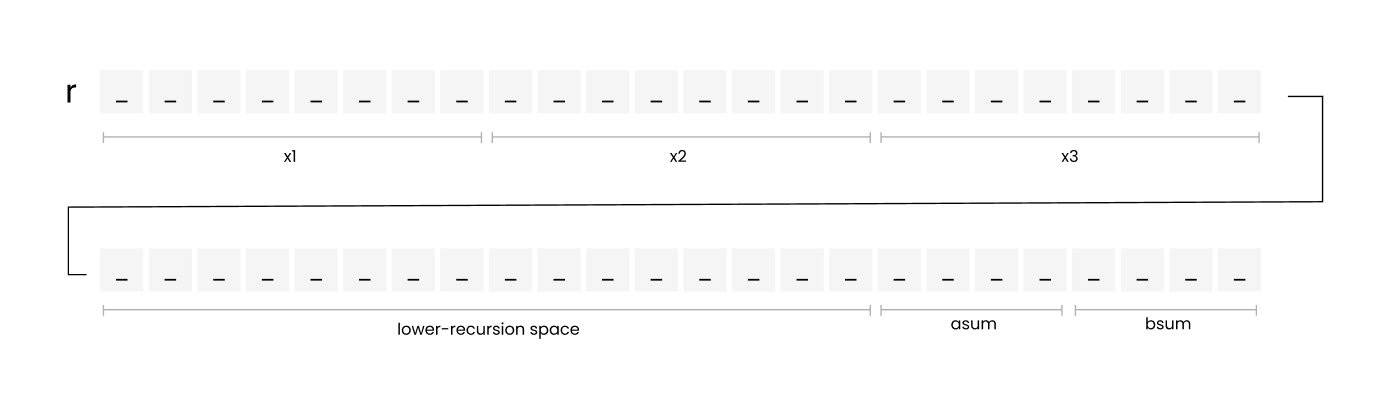

A “lower‐recursion space” é a parte do vetor de scratch (no nosso caso, o vetor ret) reservada para ser usada internamente pelas chamadas recursivas do algoritmo. Em vez de fazer novas alocações de memória para cada nível da recursão, o algoritmo “reaproveita” o espaço já alocado de forma organizada.

<br>

> **OBS** <br>
> A cada chamada recursiva, como **d** é divido pela metade, as posições do vetor de resultado original que os ponteiros passam a apontar são diferentes.

<br>

### **1.3 Exemplo de execução**

Vamos multiplicar os números 146123 e 352120 utilizando o algoritmo de Karatsuba.

Inicialmente, os valores são invertidos nos vetores. O tamanho dos vetores (**d**) é a menor potência de 2 que seja maior que o número de dígitos em a e b. Nesse caso, como temos 6 dígitos em ambos os casos, o tamanho dos vetores será 8. Os espaços sobrando são preenchidos com 0.

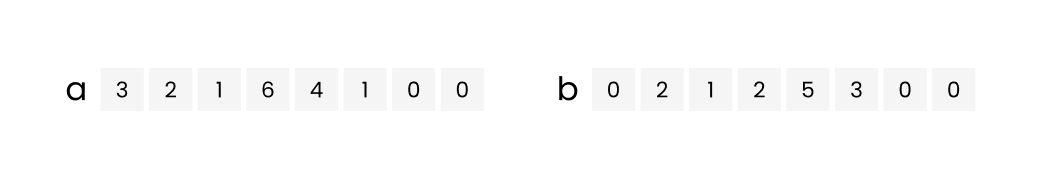

Dentro da função principal, ocorre a divisão entre as metades altas e baixas

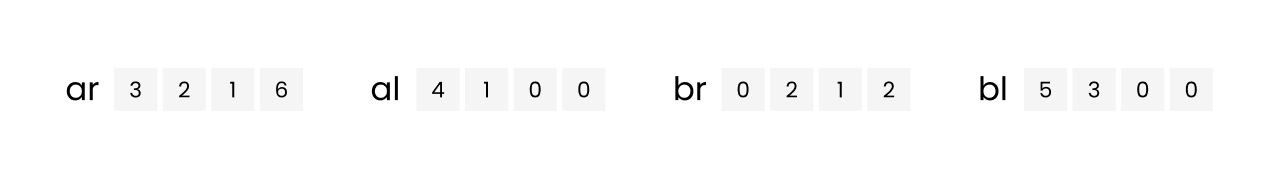

Além do cálculo de asum e bsum, que são colocadas em suas devidas posições no vetor de resultado ret.

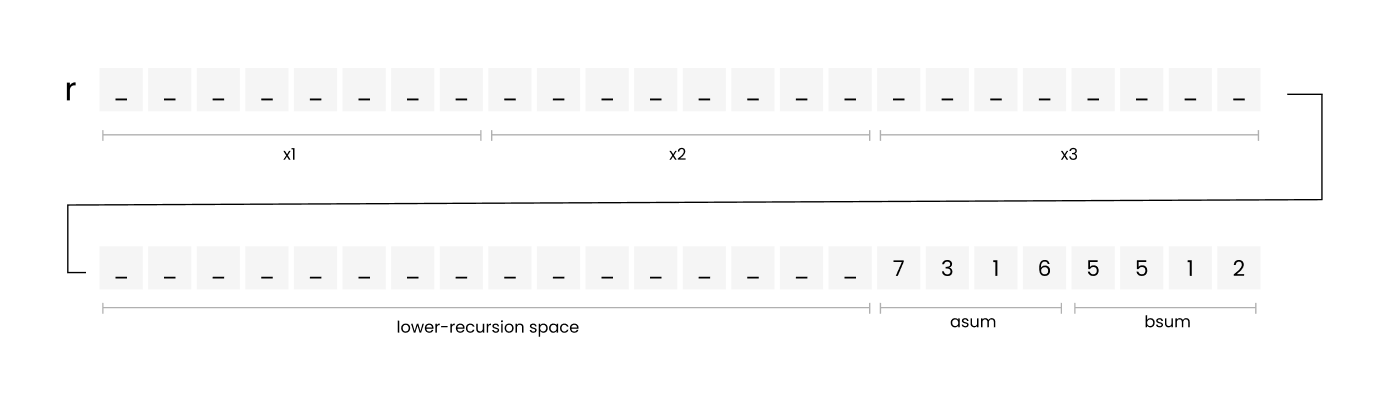

Passamos então para as chamadas recursivas.

```
  karatsuba(ar, br, x1, d/2);
  karatsuba(al, bl, x2, d/2);
  karatsuba(asum, bsum, x3, d/2);
```

<br>


Como KARAT_CUTOFF = 4, e os vetores que são passados nas chamadas recursivas tem tamanho 4, passamos a calcular o caso base, ou seja, gradeSchool(). A seguir está o vetor de resultado após cada chamada recursiva.

<br>


**ar x br**
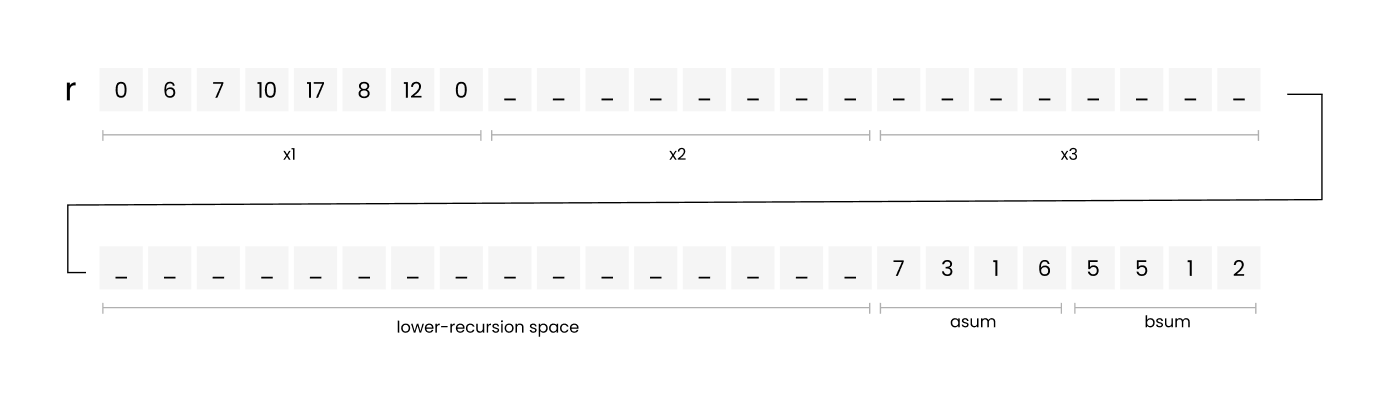

**al x bl**

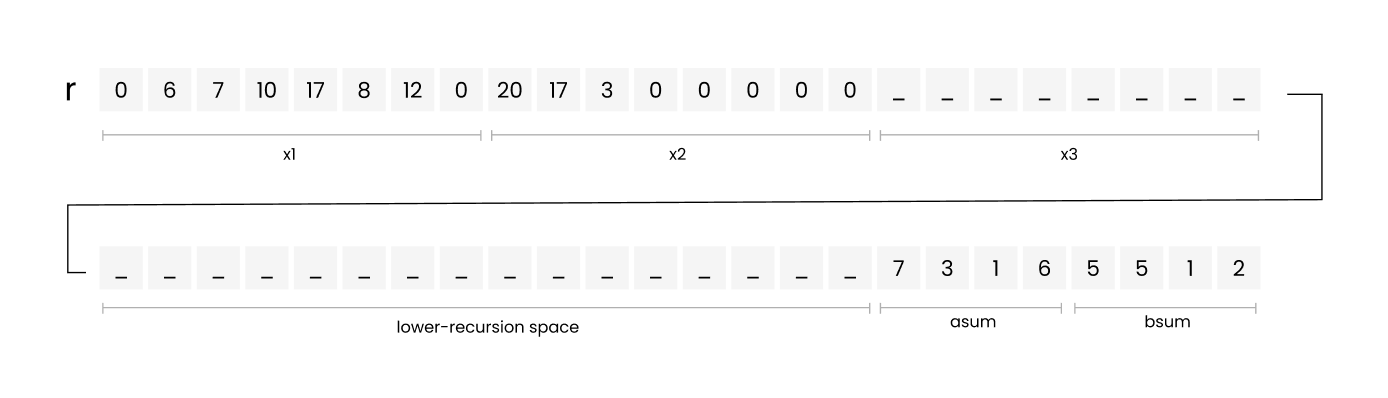

**asum x bsum**

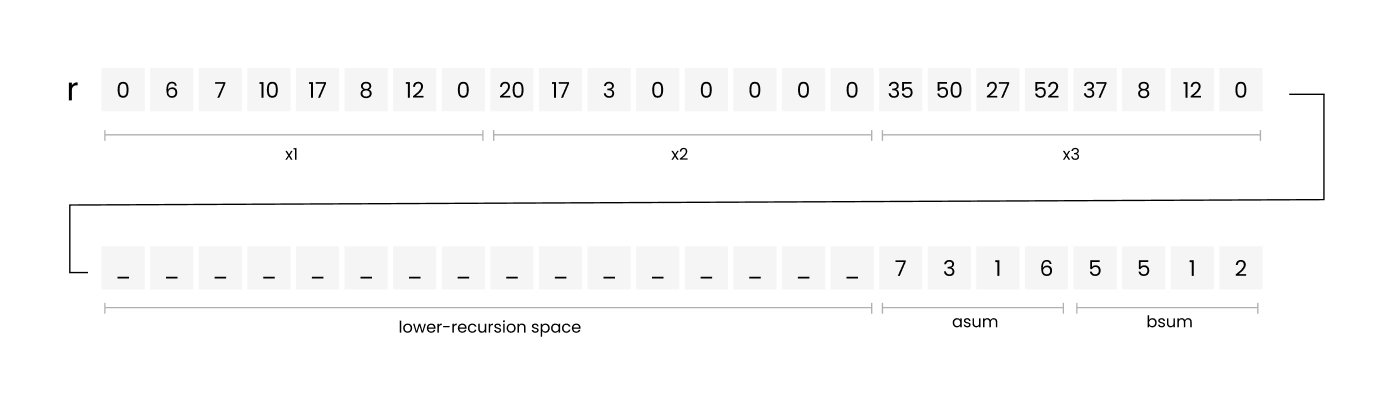

Após atingir o caso base, retorna combinando os resultados no nível superior.

```
  for(i = 0; i < d; i++) x3[i] = x3[i] - x1[i] - x2[i];
  for(i = 0; i < d; i++) ret[i + d/2] += x3[i];
```

<br>

x3 = [35, 50, 27, 52, 37, 8, 12, 0] – x1 = [0, 6, 7, 10, 17, 8, 12, 0] – x2 = [20, 17, 3, 0, 0, 0, 0, 0]

**x3 =** [15, 27, 17, 42, 20, 0, 0, 0]

<br>

Como esse é um caso bem simples, não precisamos utilizar low-recursion space.

Por fim, monta os resultados no vetor de resultado (ainda sem carry):

<br>

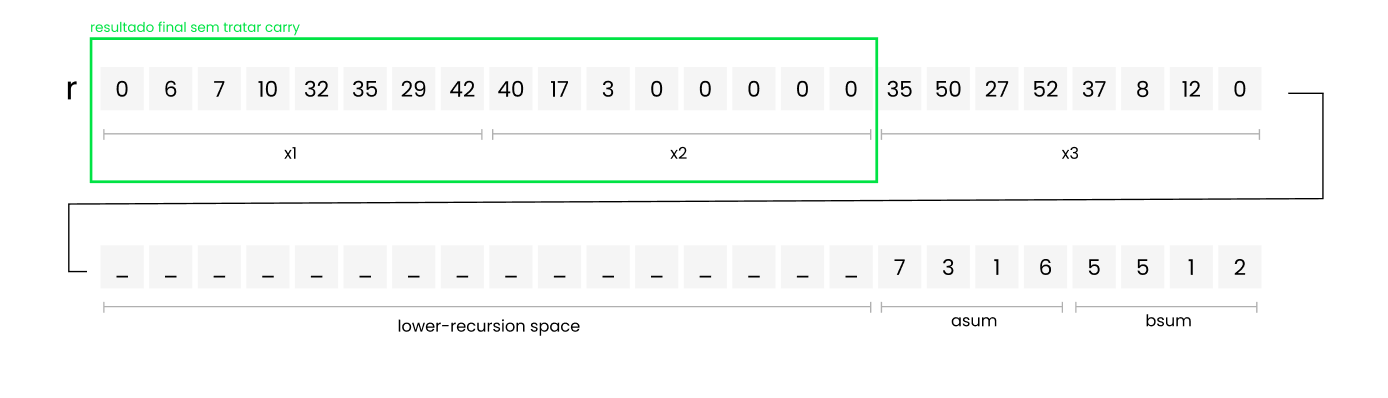

<br>

Após passar por doCarry(), temos como resultado: 51452830760.

<br>

### **1.4 Algoritmo base**

In [ ]:
%%writefile karatsuba.c
#include <stdlib.h>
#include <stdio.h>
#include <time.h>

#define MAX_DIGITS 2097152

#define KARAT_CUTOFF 4

void randomNum(int *a, int *d);
void karatsuba(int *a, int *b, int *ret, int d);
void gradeSchool(int *a, int *b, int *ret, int d);
void doCarry(int *a, int d);
void getNum(int *a, int *d_a);
void printNum(int *a, int d);

int a[MAX_DIGITS]; // first multiplicand
int b[MAX_DIGITS]; // second multiplicand
int r[6 * MAX_DIGITS]; // result goes here

int
main() {
  int d_a; // length of a
  int d_b; // length of b
  int d; // maximum length
  int i; // counter

  // Recebe os números da multiplicação por stdin nos vetores a e b, calcula o tamanho de cada vetor e inverte eles
  // getNum(a, &d_a);
  // getNum(b, &d_b);

  // Inicializa os numeros para multiplicação de forma aleátória (para testes)
  printf("Initializing random numbers...\n");
  srand(time(NULL));
  d_a = 32768; // (2^15)
  d_b = 32768; // (2^15)

  randomNum(a, &d_a);
  randomNum(b, &d_b);

  // Verifica se os números são válidos (não são entradas vazias)
  if(d_a < 0 || d_b < 0) {
    printf("0\n");
    exit(0);
    return 0;
  }

  // Inicializa todo o vetor inicial com 0, em caso de um número possuir menos dígitos que o outro
  // let d be the smallest power of 2 greater than d_a and d_b,
  // and zero out the rest of a and b.
  i = (d_a > d_b) ? d_a : d_b;
  for(d = 1; d < i; d *= 2){};
  for(i = d_a; i < d; i++){
       a[i] = 0;
  };
  for(i = d_b; i < d; i++) {
      b[i] = 0;
  };

  // do the trials, first for Karatsuba, then for grade-school.
  // For each trial, we print the result, followed by the time
  // taken per multiplication, followed by the number of
  // multiplications done. We do as many multiplications as we
  // can until we pass away an entire second.

  // Medição de tempo
  clock_t start, end;
  double cpu_time_used;

  printf("Running Karatsuba multiplication...\n");
  start = clock();
  karatsuba(a, b, r, d); // compute product w/o regard to carry
  doCarry(r, 2 * d); // now do any carrying
  end = clock();

  cpu_time_used = ((double) (end - start)) / CLOCKS_PER_SEC;
  printf("Time: %f segundos\n", cpu_time_used);

  printNum(r, 2 * d);

  return 0;
}

// Inicializa os dois números da multiplicação aleatoriamente
void
randomNum(int *a, int *d){
  for (int i = 0; i < *d; i++){
    a[i] = rand() % 10;
  }

  if(*d > 0 && a[*d-1] == 0){
    a[*d-1] = (rand() % 9) + 1;
  }
}

// ret must have space for 6d digits.
// the result will be in only the first 2d digits
// my use of the space in ret is pretty creative.
// | ar*br  | al*bl  | asum*bsum | lower-recursion space | asum | bsum |
//  d digits d digits  d digits     3d digits              d/2    d/2
void
karatsuba(int *a, int *b, int *ret, int d) {
  int i;
  int *ar = &a[0]; // low-order half of a
  int *al = &a[d/2]; // high-order half of a
  int *br = &b[0]; // low-order half of b
  int *bl = &b[d/2]; // high-order half of b
  int *asum = &ret[d * 5]; // sum of a's halves
  int *bsum = &ret[d * 5 + d/2]; // sum of b's halves
  int *x1 = &ret[d * 0]; // ar*br's location
  int *x2 = &ret[d * 1]; // al*bl's location
  int *x3 = &ret[d * 2]; // asum*bsum's location

  // when d is small, we're better off just reverting to
  // grade-school multiplication, since it's faster at this point.
  if(d <= KARAT_CUTOFF) {
    gradeSchool(a, b, ret, d);
    return;
  }

  // compute asum and bsum
  for(i = 0; i < d / 2; i++) {
    asum[i] = al[i] + ar[i];
    bsum[i] = bl[i] + br[i];
  }

  // do recursive calls (I have to be careful about the order,
  // since the scratch space for the recursion on x1 includes
  // the space used for x2 and x3)
  karatsuba(ar, br, x1, d/2);
  karatsuba(al, bl, x2, d/2);
  karatsuba(asum, bsum, x3, d/2);

  // combine recursive steps
  for(i = 0; i < d; i++) x3[i] = x3[i] - x1[i] - x2[i];
  for(i = 0; i < d; i++) ret[i + d/2] += x3[i];
}

// Multiplicação padrão
void
gradeSchool(int *a, int *b, int *ret, int d) {
  int i, j;

  for(i = 0; i < 2 * d; i++) ret[i] = 0;
  for(i = 0; i < d; i++) {
    for(j = 0; j < d; j++) ret[i + j] += a[i] * b[j];
  }
}

// Realiza o carry da multiplicação
void
doCarry(int *a, int d) {
  int c;
  int i;

  c = 0;
  for(i = 0; i < d; i++) {
    a[i] += c;
    if(a[i] < 0) {
      c = -(-(a[i] + 1) / 10 + 1);
    } else {
      c = a[i] / 10;
    }
    a[i] -= c * 10;
  }
  if(c != 0) fprintf(stderr, "Overflow %d\n", c);
}

// Função para ler os números da multiplicação com stdin
void
getNum(int *a, int *d_a) {
  int c;
  int i;

  *d_a = 0;
  while(1) {
    c = getchar();
    if(c == '\n' || c == EOF) break;
    if(*d_a >= MAX_DIGITS) {
      fprintf(stderr, "using only first %d digits\n", MAX_DIGITS);
      while(c != '\n' && c != EOF) c = getchar();
    }
    a[*d_a] = c - '0';
    ++(*d_a);
  }
  // reverse the number so that the 1's digit is first
  for(i = 0; i * 2 < *d_a - 1; i++) {
    c = a[i], a[i] = a[*d_a - i - 1], a[*d_a - i - 1] = c;
  }
}

// Função para imprimir o resultado
void
printNum(int *a, int d) {
  int i;
  for(i = d - 1; i > 0; i--) if(a[i] != 0) break;
  for(; i >= 0; i--) printf("%d", a[i]);
  printf("\n");
}

Overwriting karatsuba.c


In [ ]:
!gcc -o karatsuba -O3 karatsuba.c
!time ./karatsuba

Initializing random numbers...
Running Karatsuba multiplication...
Time: 0.079657 segundos
629807510448370980608405911685197052254024906497376566773554038305914834118294837524899732031665974014117049114119167100529079155593545959080146050597470546191258365249716163977095747609682076820866598897137141213115619271294582754437256733523742882259552105589954762237913261872795387523857978654254024676995609633951447990502951753989616911125396091128992997670922360739922651379402736803946513221331696152559379802039718686645060536238153039181604310227439371293980186261090491827679698915656844809319483108872039153470619448861194523433759388877861952311496724483110770743734334535542329682852419630555049056568923765294238559298370658026526317787665302053949546214773392937808559078722201761089626428847776376795499356064274944642719766719450373743287199396055825711306524206048623995798615254943983246160446166828160973626513522894900190820362096256771722085629118209721337302422581564895979225497479543

<br>

### **1.5 O problema com a paralelização**

Um dos maiores problemas em tentar paralelizar a recursão de karatsuba é tratar as condições de corrida no vetor de resultado, uma vez que ele é responsável por armazenar tanto o resultado final como os intermediários.

Podemos visualizar esse problema utilizando o exemplo 1.3, ao chamar as três primeiras recursões. Vamos ilustrar cada pedaço do vetor utilizado por cada chamada da função.

<br>

Para a primeira recursão ``` karatsuba(ar, br, x1, d/2); ```

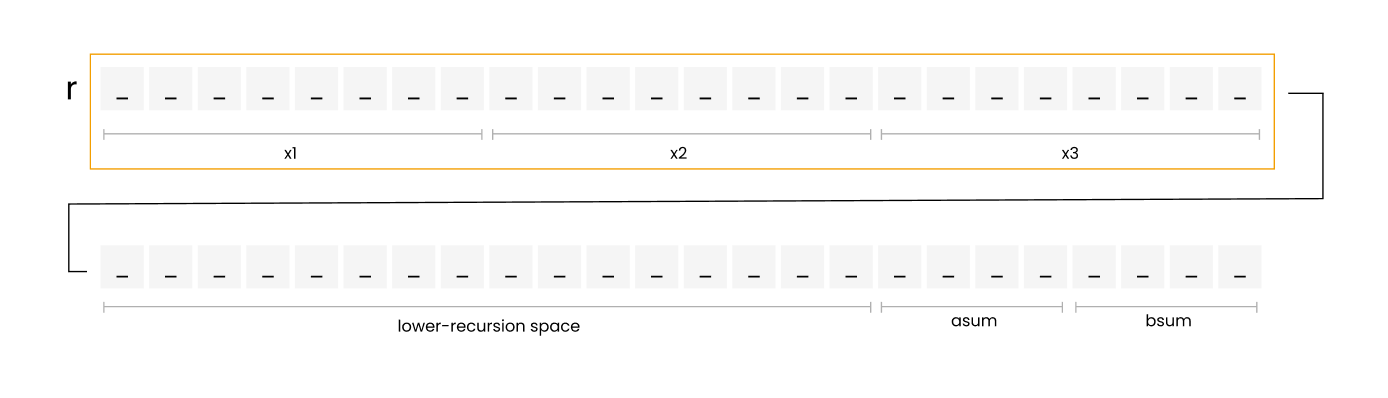

Para a segunda recursão ```karatsuba(al, bl, x2, d/2);```

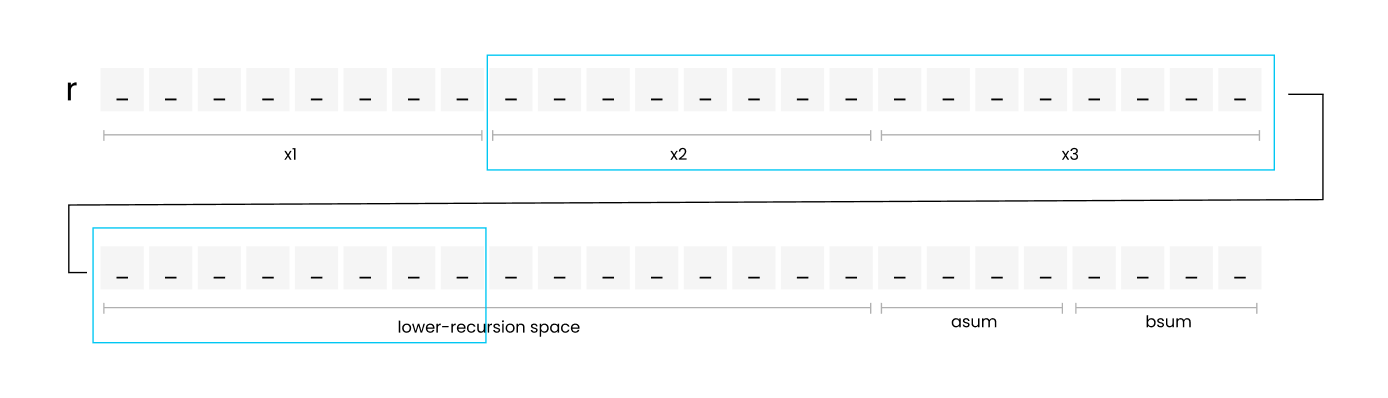

Para a terceira recursão ```karatsuba(asum, bsum, x3, d/2);```

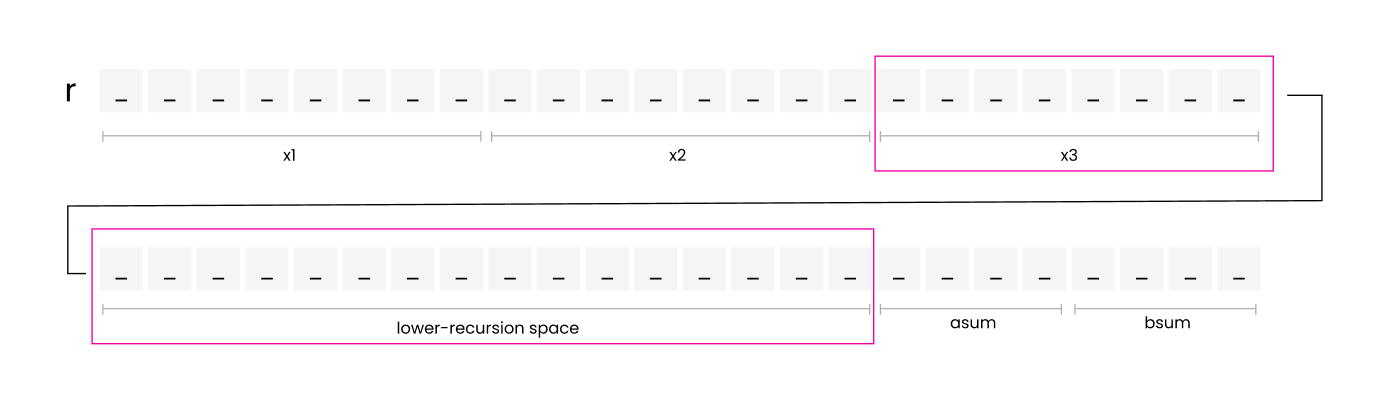

<br>

---

<br>

# **2. Implementação paralela usando threads em sistema com memória compartilhada**

Sobre a estratégia de decomposição

### **2.1 Decomposição de Dados (SPMD)**
Todos os processos executam o mesmo código, mas cada um trabalha em uma parte diferente dos dados. No caso do Karatsuba:

<br>

**Divisão dos Dados**

Os números são representados como vetores de dígitos e divididos recursivamente em duas metades.

<br>

**Execução Recursiva Paralela**

Cada processo, executando o mesmo código da função karatsuba(), resolve um subproblema (por exemplo, uma das três multiplicações P1, P2 ou P3) que é independente dos outros.

<br>

**Combinação dos Resultados**

Após resolver os subproblemas, os processos (ou o mesmo processo, recursivamente) combinam os resultados para formar o produto final.Todas as threads executam o mesmo código recursivo (modelo SPMD), mas cada task trata de uma parte específica dos dados (os subproblemas menores), resultando em uma distribuição dos dados conforme a divisão inerente do algoritmo.

<br>

Assim, para este problema, resolvermos fazer as seguintes alterações:

<br>

### **2.2 Região paralela no main**

A chamada a karatsuba é encapsulada em uma região `#pragma omp parallel` com um bloco `#pragma omp single`, garantindo que somente uma thread executa a chamada inicial de karatsuba. Isso também garante que as tarefas criadas dentro da recursão possam ser executadas por diferentes threads.



```
    start = omp_get_wtime();

    // Inicia região paralela; a task única dispara a recursão paralela (se for apropriado)
    #pragma omp parallel
    {
        #pragma omp single
        {
            karatsuba(a, b, r, d);
        }
    }

    doCarry(r, 2 * d);

    end = omp_get_wtime();
```

Após a multiplicação, a função doCarry propaga os "vai-um" (carry) pelos dígitos do resultado.

São medidos os tempos de início e fim para calcular o tempo total de execução.

<br>

### **2.3 Função karatsuba**

Inicialmente, verificamos nosso caso base, ou seja, se a quantidade de dígitos é maior que o KARAT_CUTOFF. Se o número de dígitos d for pequeno (≤ 4), utiliza a multiplicação tradicional (método “escola”) pela função gradeSchool.

Além disso, calculamos o novo tamanho das duas metades que representarão os componentes de menor e maior ordem dos números.

```
    if(d <= KARAT_CUTOFF) {
        gradeSchool(a, b, ret, d);
        return;
    }

    int new_d = d / 2;
    int i;
```

<br>

Para próxima etapa, decidimos utilizar uma nova constante: SEQUENTIAL_THRESHOLD. Ela é responsável por separar entre as execuções sequenciais (problemas menores) e criação e execuções em tasks (problemas maiores).

<br>

### **2.4 Região paralela recursiva**

Estudando a recursão, percebemos que o problema central é que, ao paralelizar a recursão, múltiplas tarefas estão utilizando o mesmo array global `ret` (que serve como espaço auxiliar) para armazenar os resultados intermediários. Isso leva a condições de corrida e, consequentemente, à corrupção dos dados. Isso nos levou a enfrentar problemas de overflow durante o estágio de carry.

Para resolver esse erro, decidimos utilizar alocação dinâmica de memória para cada chamada recursiva. Em vez de usar um array global compartilhado para os espaços auxiliares, cada chamada recursiva pode alocar seu próprio buffer (por exemplo, com malloc) do tamanho necessário para seus cálculos. Dessa forma, cada tarefa tem sua própria área de trabalho, evitando sobreposição.

<br>

> A alocação dinâmica garante isolamento, mas pode introduzir overhead de gerenciamento de memória em níveis muito profundos da recursão.

<br>

Assim, para tentar diminuir esse problema do overhead, utilizmos uma nova constante **`SEQUENTIAL_THRESHOLD`**, que faz as chamadas recursivas com criação de tasks paralelas e alocação dinâmica de memória apenas para números com quanidades de dígitos maiores que SEQUENTIAL_THRESHOLD. Ou seja, quando o problema fica pequeno o suficiente, passa a realizar uma recursão sequencial na própria task.

```
    else {
        // Para problemas maiores, usa tasks paralelas com alocação dinâmica
        int *x1 = malloc(sizeof(int) * d);
        int *x2 = malloc(sizeof(int) * d);
        int *x3 = malloc(sizeof(int) * d);
        int *asum = malloc(sizeof(int) * new_d);
        int *bsum = malloc(sizeof(int) * new_d);

        if(!x1 || !x2 || !x3 || !asum || !bsum) {
            fprintf(stderr, "Memory allocation failed\n");
            exit(1);
        }

        #pragma omp parallel for private(i) schedule(static)
        for(i = 0; i < new_d; i++) {
            asum[i] = a[new_d + i] + a[i];
            bsum[i] = b[new_d + i] + b[i];
        }

        #pragma omp task shared(x1) if(d > SEQUENTIAL_THRESHOLD)
        {
            karatsuba(a, b, x1, new_d);
        }
        #pragma omp task shared(x2) if(d > SEQUENTIAL_THRESHOLD)
        {
            karatsuba(a + new_d, b + new_d, x2, new_d);
        }
        #pragma omp task shared(x3) if(d > SEQUENTIAL_THRESHOLD)
        {
            karatsuba(asum, bsum, x3, new_d);
        }
        #pragma omp taskwait

        for(i = 0; i < d; i++) {
            x3[i] = x3[i] - x1[i] - x2[i];
        }

        for(i = 0; i < 2 * d; i++) ret[i] = 0;
        for(i = 0; i < d; i++) ret[i] += x1[i];
        for(i = 0; i < d; i++) ret[i + new_d] += x3[i];
        for(i = 0; i < d; i++) ret[i + d] += x2[i];

        free(x1); free(x2); free(x3); free(asum); free(bsum);
    }
```

<br>


### **2.5 Algoritmo com OpenMP (v1.0)**

In [ ]:
%%writefile karatsuba_omp1.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <omp.h>

#define MAX_DIGITS 2097152
#define KARAT_CUTOFF 4
// Quando d <= SEQUENTIAL_THRESHOLD, executa a recursão sem tasks (alocação na stack)
#define SEQUENTIAL_THRESHOLD 2048

// Protótipos
void randomNum(int *a, int *d);
void karatsuba(int *a, int *b, int *ret, int d);
void gradeSchool(int *a, int *b, int *ret, int d);
void doCarry(int *a, int d);
void getNum(int *a, int *d_a);
void printNum(int *a, int d);

int a[MAX_DIGITS];       // primeiro multiplicando
int b[MAX_DIGITS];       // segundo multiplicando
// O produto terá até 2*d dígitos; alocamos um vetor suficientemente grande.
int r[4 * MAX_DIGITS];

int main() {
    int d_a; // length of a
    int d_b; // length of b
    int d; // maximum length
    int i; // counter
    double start, end; // Variáveis de tempo

    // Recebe os números da multiplicação por stdin nos vetores a e b, calcula o tamanho de cada vetor e inverte eles
    // getNum(a, &d_a);
    // getNum(b, &d_b);

    // Para teste, inicializamos números aleatórios.
    printf("Initializing random numbers...\n");
    srand(time(NULL));
    d_a = 32768; // (2^15)
    d_b = 32768; // (2^15)

    randomNum(a, &d_a);
    randomNum(b, &d_b);

    if(d_a < 0 || d_b < 0) {
        printf("0\n");
        exit(0);
    }

    // Padroniza o tamanho para a menor potência de 2 que seja >= max(d_a, d_b)
    i = (d_a > d_b) ? d_a : d_b;
    for(d = 1; d < i; d *= 2);
    for(i = d_a; i < d; i++){
        a[i] = 0;
    }
    for(i = d_b; i < d; i++){
        b[i] = 0;
    }

    printf("Running Karatsuba multiplication...\n");

    start = omp_get_wtime();

    // Inicia região paralela; a task única dispara a recursão paralela (se for apropriado)
    #pragma omp parallel
    {
        #pragma omp single
        {
            karatsuba(a, b, r, d);
        }
    }

    doCarry(r, 2 * d);

    end = omp_get_wtime();

    printf("Work took %f seconds\n", end - start);
    printf("Precision of the timer is %f (sec)\n", omp_get_wtick());
    printNum(r, 2 * d);
    return 0;
}

// Gera um número aleatório (com dígitos) em 'a'
void randomNum(int *a, int *d) {
    for (int i = 0; i < *d; i++) {
        a[i] = rand() % 10;
    }
    if(*d > 0 && a[*d - 1] == 0) {
        a[*d - 1] = (rand() % 9) + 1;
    }
}

// Implementa a multiplicação Karatsuba
// Se d <= KARAT_CUTOFF, utiliza multiplicação "escola"
// Se d <= SEQUENTIAL_THRESHOLD, usa recursão sequencial com alocação na stack
// Caso contrário, usa tasks OpenMP com alocação dinâmica
void karatsuba(int *a, int *b, int *ret, int d) {
    if(d <= KARAT_CUTOFF) {
        gradeSchool(a, b, ret, d);
        return;
    }

    int new_d = d / 2;
    int i;

    // Recursão sequencial sem tasks para problemas pequenos
    if(d <= SEQUENTIAL_THRESHOLD) {
        // Aloca buffers na stack
        int x1[d], x2[d], x3[d];
        int asum[new_d], bsum[new_d];

        // soma das duas metades
        for(i = 0; i < new_d; i++) {
            asum[i] = a[new_d + i] + a[i];
            bsum[i] = b[new_d + i] + b[i];
        }
        // chamadas recursivas sequenciais
        karatsuba(a, b, x1, new_d);
        karatsuba(a + new_d, b + new_d, x2, new_d);
        karatsuba(asum, bsum, x3, new_d);
        // Ajusta x3: x3 = x3 - x1 - x2
        for(i = 0; i < d; i++) {
            x3[i] = x3[i] - x1[i] - x2[i];
        }
        // Inicializa ret com zeros e combina os resultados:
        for(i = 0; i < 2 * d; i++) ret[i] = 0;
        for(i = 0; i < d; i++) ret[i] += x1[i];
        for(i = 0; i < d; i++) ret[i + new_d] += x3[i];
        for(i = 0; i < d; i++) ret[i + d] += x2[i];
        return;
    }
    else {
        // Para problemas maiores, usa tasks paralelas com alocação dinâmica
        int *x1 = malloc(sizeof(int) * d);
        int *x2 = malloc(sizeof(int) * d);
        int *x3 = malloc(sizeof(int) * d);
        int *asum = malloc(sizeof(int) * new_d);
        int *bsum = malloc(sizeof(int) * new_d);
        if(!x1 || !x2 || !x3 || !asum || !bsum) {
            fprintf(stderr, "Memory allocation failed\n");
            exit(1);
        }

        #pragma omp parallel for private(i) schedule(static)
        for(i = 0; i < new_d; i++) {
            asum[i] = a[new_d + i] + a[i];
            bsum[i] = b[new_d + i] + b[i];
        }

        #pragma omp task
        {
            karatsuba(a, b, x1, new_d);
        }
        #pragma omp task
        {
            karatsuba(a + new_d, b + new_d, x2, new_d);
        }
        #pragma omp task
        {
            karatsuba(asum, bsum, x3, new_d);
        }
        #pragma omp taskwait

        for(i = 0; i < d; i++) {
            x3[i] = x3[i] - x1[i] - x2[i];
        }
        for(i = 0; i < 2 * d; i++) ret[i] = 0;
        for(i = 0; i < d; i++) ret[i] += x1[i];
        for(i = 0; i < d; i++) ret[i + new_d] += x3[i];
        for(i = 0; i < d; i++) ret[i + d] += x2[i];

        free(x1); free(x2); free(x3); free(asum); free(bsum);
    }
}

// Multiplicação tradicional ("escola")
void gradeSchool(int *a, int *b, int *ret, int d) {
    int i, j;
    for(i = 0; i < 2 * d; i++) ret[i] = 0;
    for(i = 0; i < d; i++) {
        for(j = 0; j < d; j++) {
            ret[i + j] += a[i] * b[j];
        }
    }
}

// Realiza o carry (ajuste dos dígitos) no resultado
void doCarry(int *a, int d) {
    int c = 0;
    int i;
    for(i = 0; i < d; i++) {
        a[i] += c;
        c = a[i] / 10;
        a[i] %= 10;
    }
    if(c != 0) fprintf(stderr, "Overflow %d\n", c);
}

// Lê um número da entrada padrão (não utilizado nesta versão de teste)
void getNum(int *a, int *d_a) {
    int c, i;
    *d_a = 0;
    while((c = getchar()) != '\n' && c != EOF) {
        if(*d_a >= MAX_DIGITS) {
            fprintf(stderr, "using only first %d digits\n", MAX_DIGITS);
            while((c = getchar()) != '\n' && c != EOF);
            break;
        }
        a[*d_a] = c - '0';
        (*d_a)++;
    }
    // Inverte o número para que o dígito das unidades fique na posição 0
    for(i = 0; i * 2 < *d_a - 1; i++) {
        int tmp = a[i];
        a[i] = a[*d_a - i - 1];
        a[*d_a - i - 1] = tmp;
    }
}

// Imprime o número (removendo zeros à esquerda)
void printNum(int *a, int d) {
    int i;
    for(i = d - 1; i > 0; i--) {
        if(a[i] != 0) break;
    }
    for(; i >= 0; i--) {
        printf("%d", a[i]);
    }
    printf("\n");
}

Overwriting karatsuba_omp1.c


In [ ]:
!gcc -fopenmp -o karatsuba_omp1 -O3 karatsuba_omp1.c
!time ./karatsuba_omp1

Initializing random numbers...
Running Karatsuba multiplication...
Work took 0.088511 seconds
Precision of the timer is 0.000000 (sec)
8616433133003610974119962963855158178880055258451142132064225709718375072684768504409683970521896466505174450273849267497367628613438231953025200199715937515384264021517626979728403336935349712789559025826913336057017843724381571965319750868828364210882502686401608135335298158621053084346447676066673475230304125232534896715577766868360438916071272494339630999020943684798180868072905286019191042012978516097474325854992335720989820320838337127562078417587599173113599948794611206002657162832712901297962447079055069648624757307750564271210974549437085076042035129088715984224309860784849246490129272323951731677254352812242746501039112741638562361672124771531819823448182573668118764492895269834438208855826637783070728835053078940458358385456645279539496006780482533341577866666257784572019734497725356442353691060164552229816588792694435734337321961363880515993

<br>

### **2.6 Algoritmo com OpenMP (v2.0)**

O problema com a primeira implementação é a grande quantidade de alocação dinâmica de memória desnecessária. Dessa forma, a principal diferença entre as duas implementações está em como elas gerenciam a memória para os buffers intermediários usados na recursão do algoritmo Karatsuba.

Em vez de usar malloc, essa versão utiliza alocação na stack (através de arrays de tamanho variável (VLA's) ou de um pool de memória local) para criar os mesmos buffers. Um bloco único de memória é pré-alocado na stack e depois particionado em segmentos para cada variável intermediária. Isso elimina o overhead do heap, mas impõe a limitação do tamanho da stack, podendo ocasionar estouro para problemas muito grandes.

In [ ]:
%%writefile karatsuba_omp2.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <omp.h>

#define MAX_DIGITS 2097152
#define KARAT_CUTOFF 4
// Quando d <= SEQUENTIAL_THRESHOLD, executa a recursão sem tasks
#define SEQUENTIAL_THRESHOLD 2048

// Protótipos
void randomNum(int *a, int *d);
void karatsuba(int *a, int *b, int *ret, int d);
void gradeSchool(int *a, int *b, int *ret, int d);
void doCarry(int *a, int d);
void getNum(int *a, int *d_a);
void printNum(int *a, int d);

int a[MAX_DIGITS];       // primeiro multiplicando
int b[MAX_DIGITS];       // segundo multiplicando
// O produto terá até 2*d dígitos; alocamos um vetor suficientemente grande.
int r[4 * MAX_DIGITS];

int main() {
    int d_a; // tamanho de a
    int d_b; // tamanho de b
    int d;   // tamanho padronizado (potência de 2)
    int i;
    double start, end; // para medir o tempo

    // Lê os números de entrada (ou utilize números aleatórios para teste)
    // getNum(a, &d_a);
    // getNum(b, &d_b);

    // Para teste, inicializamos números aleatórios.
    printf("Initializing random numbers...\n");
    srand(time(NULL));
    d_a = 32768; // (2^15)
    d_b = 32768; // (2^15)

    randomNum(a, &d_a);
    randomNum(b, &d_b);

    if(d_a < 0 || d_b < 0) {
        printf("0\n");
        exit(0);
    }

    // Padroniza o tamanho para a menor potência de 2 que seja >= max(d_a, d_b)
    i = (d_a > d_b) ? d_a : d_b;
    for(d = 1; d < i; d *= 2);
    for(i = d_a; i < d; i++){
        a[i] = 0;
    }
    for(i = d_b; i < d; i++){
        b[i] = 0;
    }

    printf("Running Karatsuba multiplication (sem alocação dinâmica)...\n");

    start = omp_get_wtime();

    // Região paralela: a task única dispara a recursão paralela
    #pragma omp parallel
    {
        #pragma omp single
        {
            karatsuba(a, b, r, d);
        }
    }

    doCarry(r, 2 * d);

    end = omp_get_wtime();

    printf("Work took %f seconds\n", end - start);
    printf("Precision of the timer is %f (sec)\n", omp_get_wtick());
    printNum(r, 2 * d);
    return 0;
}

// Gera um número aleatório (com dígitos) em 'a'
void randomNum(int *a, int *d) {
    for (int i = 0; i < *d; i++) {
        a[i] = rand() % 10;
    }
    if(*d > 0 && a[*d - 1] == 0) {
        a[*d - 1] = (rand() % 9) + 1;
    }
}

// Implementa a multiplicação Karatsuba sem alocação dinâmica.
// Para d <= KARAT_CUTOFF, utiliza multiplicação "escola".
// Para d <= SEQUENTIAL_THRESHOLD, utiliza recursão sequencial com VLAs.
// Para casos maiores, utiliza tasks OpenMP, mas todos os buffers são alocados na stack.
void karatsuba(int *a, int *b, int *ret, int d) {
    if(d <= KARAT_CUTOFF) {
        gradeSchool(a, b, ret, d);
        return;
    }

    int new_d = d / 2;
    int i;

    // Caso sequencial
    if(d <= SEQUENTIAL_THRESHOLD) {
        int x1[d], x2[d], x3[d];
        int asum[new_d], bsum[new_d];

        // Soma das duas metades
        for(i = 0; i < new_d; i++) {
            asum[i] = a[new_d + i] + a[i];
            bsum[i] = b[new_d + i] + b[i];
        }

        // Chamadas recursivas sequenciais
        karatsuba(a, b, x1, new_d);
        karatsuba(a + new_d, b + new_d, x2, new_d);
        karatsuba(asum, bsum, x3, new_d);

        // Ajusta x3: x3 = x3 - x1 - x2
        for(i = 0; i < d; i++) {
            x3[i] = x3[i] - x1[i] - x2[i];
        }

        // Combina os resultados em ret
        for(i = 0; i < 2 * d; i++) ret[i] = 0;
        for(i = 0; i < d; i++) ret[i] += x1[i];
        for(i = 0; i < d; i++) ret[i + new_d] += x3[i];
        for(i = 0; i < d; i++) ret[i + d] += x2[i];
        return;
    }
    else {
        // Para problemas maiores, utiliza tasks paralelas com buffers alocados na stack
        // Calcula o espaço necessário: precisamos de 3 buffers de tamanho d (x1, x2, x3)
        // e de 2 buffers de tamanho new_d (asum e bsum), onde 2*new_d == d.
        int local_ws[4 * d]; // 3*d + d = 4*d
        int *x1 = local_ws;             // tamanho d
        int *x2 = local_ws + d;           // tamanho d
        int *x3 = local_ws + 2 * d;       // tamanho d
        int *asum = local_ws + 3 * d;     // tamanho new_d (pois 2*new_d == d)
        int *bsum = local_ws + 3 * d + new_d; // logo, tamanho new_d

        // Soma das duas metades
        for(i = 0; i < new_d; i++) {
            asum[i] = a[new_d + i] + a[i];
            bsum[i] = b[new_d + i] + b[i];
        }

        // Cria tasks para as três chamadas recursivas
        #pragma omp task shared(x1)
        {
            karatsuba(a, b, x1, new_d);
        }
        #pragma omp task shared(x2)
        {
            karatsuba(a + new_d, b + new_d, x2, new_d);
        }
        #pragma omp task shared(x3)
        {
            karatsuba(asum, bsum, x3, new_d);
        }
        #pragma omp taskwait

        // Ajusta x3: x3 = x3 - x1 - x2
        for(i = 0; i < d; i++) {
            x3[i] = x3[i] - x1[i] - x2[i];
        }

        // Combina os resultados em ret
        for(i = 0; i < 2 * d; i++) ret[i] = 0;
        for(i = 0; i < d; i++) ret[i] += x1[i];
        for(i = 0; i < d; i++) ret[i + new_d] += x3[i];
        for(i = 0; i < d; i++) ret[i + d] += x2[i];
    }
}

// Multiplicação tradicional ("escola")
void gradeSchool(int *a, int *b, int *ret, int d) {
    int i, j;
    for(i = 0; i < 2 * d; i++) ret[i] = 0;
    for(i = 0; i < d; i++) {
        for(j = 0; j < d; j++) {
            ret[i + j] += a[i] * b[j];
        }
    }
}

// Realiza o carry (ajuste dos dígitos) no resultado
void doCarry(int *a, int d) {
    int c = 0, i;
    for(i = 0; i < d; i++) {
        a[i] += c;
        c = a[i] / 10;
        a[i] %= 10;
    }
    if(c != 0) fprintf(stderr, "Overflow %d\n", c);
}

// Lê um número da entrada padrão (para esse exemplo, os dígitos são lidos e armazenados no array)
void getNum(int *a, int *d_a) {
    int c, i;
    *d_a = 0;
    while((c = getchar()) != '\n' && c != EOF) {
        if(*d_a >= MAX_DIGITS) {
            fprintf(stderr, "using only first %d digits\n", MAX_DIGITS);
            while((c = getchar()) != '\n' && c != EOF);
            break;
        }
        a[*d_a] = c - '0';
        (*d_a)++;
    }
    // Inverte o número para que o dígito das unidades fique na posição 0
    for(i = 0; i * 2 < *d_a - 1; i++) {
        int tmp = a[i];
        a[i] = a[*d_a - i - 1];
        a[*d_a - i - 1] = tmp;
    }
}

// Imprime o número (removendo zeros à esquerda)
void printNum(int *a, int d) {
    int i;
    for(i = d - 1; i > 0; i--) {
        if(a[i] != 0) break;
    }
    for(; i >= 0; i--) {
        printf("%d", a[i]);
    }
    printf("\n");
}


Writing karatsuba_omp2.c


In [ ]:
!gcc -fopenmp -o karatsuba_omp2 -O3 karatsuba_omp2.c
!time ./karatsuba_omp2

Initializing random numbers...
Running Karatsuba multiplication (sem alocação dinâmica)...
Work took 0.042191 seconds
Precision of the timer is 0.000000 (sec)
1440035756662657119315668460368955371030921482273293864838708983486161437284402485391811462323276804598894845926718179188761166989682167874532019059370935854268919113134395427197280946968357990855965263566463242790471641048856236844653817038885882189295225210402857778030589031387503923378885658921445900944678676736666555816520505004264707836752641934176739616203450765940633850890982681610792658702269377629823902978833876531010404452529862023389790996733706570813510193995263108396807735676495375722866336837273920041968198063470899092989978356198604202123170478012885152844599953062775007133915335624681308908753207543645954396899620855697739015897450794672891880796263129583099846870751709441958576778498445805227105178177818008823780732982046261462515463800316498284872537497400104950474832116504488091612294908651702392978848295633038

<br>

### **2.7 Resultado Local**

Executando localmente em uma máquina com

Thread(s) per core: 2

Core(s) per socket: 6

<br>

**Algoritmo Sequencial**

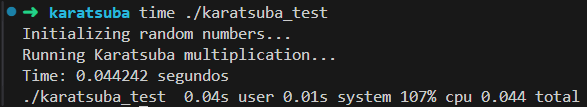
<br>

<br>

**Algoritmo Paralelizado com OpenMP**

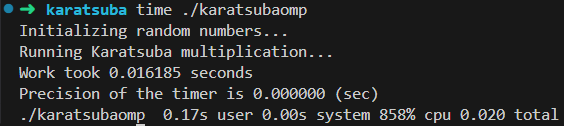

<br>

**Algoritmo Paralelizado com OpenMP (Versão 2)**

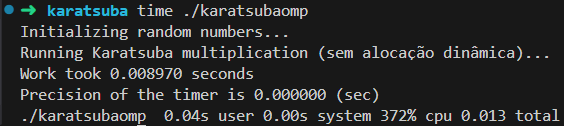


<br>

### **Speedup (v1.0)**
Considerando o resultado local, obtemos um speedup de **2.74** e a eficiência de **22,77%**

### **Speedup (v2.0)**
Considerando o resultado local, obtemos um speedup de **4.93** e a eficiência de **41%**

<br>

---

<br>

# **3. Implementação paralela para o problema usando GPUs**

### **3.1 Algoritmo CUDA (v1.0)**

**Gerenciamento de Memória**

  - Utiliza um pool de memória na GPU para evitar alocações dinâmicas dentro da recursão.
  - A estrutura MemPool gerencia alocações e liberações.

<br>

**Multiplicação via Karatsuba**

  - Se o número de dígitos for pequeno, usa multiplicação escolar (gradeSchool).
  - Para números grandes, segue a decomposição do Karatsuba:
      
      Divide os números ao meio.
      Calcula três multiplicações recursivas:
          x1 = ar * br
          x2 = al * bl
          x3 = (al + ar) * (bl + br)
      Usa x3 - x1 - x2 para calcular a parte intermediária.
      Combina os resultados.

<br>

**Paralelização CUDA**

  - Cada operação (multiplicação básica, soma das partes, combinação de resultados) é paralelizada com kernels CUDA.
  - atomicAdd é usado para evitar condições de corrida ao somar valores nas posições corretas do vetor de resultado.

<br>

In [ ]:
%%writefile cudaV1.cu
#include <stdlib.h>
#include <stdio.h>
#include <cuda_runtime.h>
#include <time.h>
#include <math.h>

#define MAX_DIGITS 2097152 // 2MB de dígitos
#define KARAT_CUTOFF 2048
#define POOL_SIZE (4ULL * (size_t)MAX_DIGITS * ((size_t)log2(MAX_DIGITS) + 1024ULL)) // Tamanho do pool de memória

// Estrutura para gerenciar o pool de memória
typedef struct
{
  int *data;     // Memória global na GPU
  size_t offset; // Offset atual
  size_t *stack; // Stack para gerenciar offsets
  int stack_top; // Topo da stack
} MemPool;

__global__ void gradeSchool(int *a, int *b, int *ret, int d);
__global__ void computeAsumBsum(int *a, int *al, int *ar, int *b, int *bl, int *br, int *asum, int *bsum, int d);
__global__ void combineResults(int *x1, int *x2, int *x3, int *ret, int d);
__global__ void addVectors(int *dest, int *src, int offset, int n);

void randomNum(int *a, int *d);
void karatsuba(MemPool *pool, int *a, int *b, int *ret, int d);
void doCarry(int *a, int d);
void printNum(int *a, int d);

int *a;
int *b;
int *r;

void pool_init(MemPool *pool, size_t total_size)
{
  cudaMalloc(&pool->data, total_size * sizeof(int));
  cudaMallocHost(&pool->stack, 1000 * sizeof(size_t));
  pool->stack_top = -1;
  pool->offset = 0;
}

void pool_free(MemPool *pool)
{
  pool->offset = pool->stack[pool->stack_top--];
}

// Função para alocar do pool
int *pool_alloc(MemPool *pool, size_t n)
{
  pool->stack[++pool->stack_top] = pool->offset;

  // Usar size_t para comparação
  if (pool->offset + n > (size_t)POOL_SIZE)
  {
    fprintf(stderr, "Pool overflow: %zu > %zu\n",
            pool->offset + n, (size_t)POOL_SIZE);
    exit(1);
  }

  int *ptr = pool->data + pool->offset;
  pool->offset += n;
  return ptr;
}

int main()
{
  int d_a = MAX_DIGITS, d_b = MAX_DIGITS, d, i;

  a = (int *)malloc(MAX_DIGITS * sizeof(int));
  b = (int *)malloc(MAX_DIGITS * sizeof(int));
  r = (int *)malloc(6 * MAX_DIGITS * sizeof(int));

  if (!a || !b || !r)
  {
    fprintf(stderr, "Falha na alocação host\n");
    exit(1);
  }

  // Inicialização dos números
  srand(time(NULL));
  randomNum(a, &d_a);
  randomNum(b, &d_b);

  // Ajustar para potência de 2
  for (d = 1; d < (d_a > d_b ? d_a : d_b); d *= 2)
    ;
  for (i = d_a; i < d; a[i++] = 0)
    ;
  for (i = d_b; i < d; b[i++] = 0)
    ;

  clock_t start = clock();
  // Alocar pool de memória na GPU
  int recursion_depth = (int)(log2(d) - log2(KARAT_CUTOFF)) + 1;

  MemPool pool;
  size_t log_term = (size_t)(log2(MAX_DIGITS) + 1);
  size_t pool_size = 12 * MAX_DIGITS * (size_t)(log2(MAX_DIGITS) + 1);
  printf("Alocando %zu ints na GPU...\n", pool_size);
  pool_init(&pool, pool_size);
  printf("Pool alocado com sucesso!\n");

  int *dev_a, *dev_b, *dev_r;
  cudaMalloc(&dev_a, MAX_DIGITS * sizeof(int));
  cudaMalloc(&dev_b, MAX_DIGITS * sizeof(int));
  cudaMalloc(&dev_r, 6 * MAX_DIGITS * sizeof(int));

  cudaMemcpy(dev_a, a, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);
  cudaMemcpy(dev_b, b, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);
  cudaMemset(dev_r, 0, 6 * MAX_DIGITS * sizeof(int));

  karatsuba(&pool, dev_a, dev_b, dev_r, d);

  cudaMemcpy(r, dev_r, 6 * MAX_DIGITS * sizeof(int), cudaMemcpyDeviceToHost);
  doCarry(r, 2 * d);

  // printf("Number 1: ");
  // printNum(a, d_a);
  // printf("Number 2: ");
  // printNum(b, d_b);
  // printf("Result: ");
  // printNum(r, 2 * MAX_DIGITS);

  printf("Time: %f\n", ((double)(clock() - start)) / CLOCKS_PER_SEC);

  cudaFree(pool.data);
  cudaFreeHost(pool.stack);
  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_r);

  free(a);
  free(b);
  free(r);
  return 0;
}

void doCarry(int *a, int d)
{
  int c;
  int i;

  c = 0;
  for (i = 0; i < d; i++)
  {
    a[i] += c;
    if (a[i] < 0)
    {
      c = -(-(a[i] + 1) / 10 + 1);
    }
    else
    {
      c = a[i] / 10;
    }
    a[i] -= c * 10;
  }
  if (c != 0)
    fprintf(stderr, "Overflow %d\n", c);
}

void randomNum(int *a, int *d)
{
  for (int i = 0; i < *d; i++)
  {
    a[i] = rand() % 10;
  }

  if (*d > 0 && a[*d - 1] == 0)
  {
    a[*d - 1] = (rand() % 9) + 1;
  }
}

void printNum(int *a, int d)
{
  int i;
  for (i = d - 1; i > 0; i--)
    if (a[i] != 0)
      break;
  for (; i >= 0; i--)
    printf("%d", a[i]);
  printf("\n");
}

void getNum(int *a, int *d_a)
{
  int c;
  int i;

  *d_a = 0;
  while (true)
  {
    c = getchar();
    if (c == '\n' || c == EOF)
      break;
    if (*d_a >= MAX_DIGITS)
    {
      fprintf(stderr, "using only first %d digits\n", MAX_DIGITS);
      while (c != '\n' && c != EOF)
        c = getchar();
    }
    a[*d_a] = c - '0';
    ++(*d_a);
  }
  // reverse the number so that the 1's digit is first
  for (i = 0; i * 2 < *d_a - 1; i++)
  {
    c = a[i], a[i] = a[*d_a - i - 1], a[*d_a - i - 1] = c;
  }
}

// ret must have space for 6d digits.
// the result will be in only the first 2d digits
// my use of the space in ret is pretty creative.
// | ar*br  | al*bl  | asum*bsum | lower-recursion space | asum | bsum |
//  d digits d digits  d digits     3d digits              d/2    d/2
// Modifique a função karatsuba para executar na GPU
void karatsuba(MemPool *pool, int *a, int *b, int *ret, int d)
{
  if (d <= KARAT_CUTOFF)
  {
    int threads = 256;
    int max_blocks = 65535;
    int blocks = min((d * d + threads - 1) / threads, max_blocks);
    gradeSchool<<<blocks, threads>>>(a, b, ret, d);
    cudaDeviceSynchronize();
    return;
  }

  // Aloca memória
  int *x1 = pool_alloc(pool, d);
  if (!x1)
  {
    printf("Falha ao alocar x1\n");
    exit(1);
  }
  int *x2 = pool_alloc(pool, d);
  if (!x2)
  {
    printf("Falha ao alocar x2\n");
    exit(1);
  }
  int *x3 = pool_alloc(pool, d);
  if (!x3)
  {
    printf("Falha ao alocar x3\n");
    exit(1);
  }
  int *asum = pool_alloc(pool, d / 2);
  if (!asum)
  {
    printf("Falha ao alocar asum\n");
    exit(1);
  }
  int *bsum = pool_alloc(pool, d / 2);
  if (!bsum)
  {
    printf("Falha ao alocar bsum\n");
    exit(1);
  }

  // Inicializar memória
  cudaMemset(x1, 0, d * sizeof(int));
  cudaMemset(x2, 0, d * sizeof(int));
  cudaMemset(x3, 0, d * sizeof(int));

  // Configurar ponteiros
  int *ar = a, *al = a + d / 2;
  int *br = b, *bl = b + d / 2;

  // Calcular asum/bsum
  dim3 block(256), grid((d / 2 + 255) / 256);
  computeAsumBsum<<<grid, block>>>(a, al, ar, b, bl, br, asum, bsum, d);
  cudaDeviceSynchronize();

  // Chamadas recursivas
  karatsuba(pool, ar, br, x1, d / 2);
  karatsuba(pool, al, bl, x2, d / 2);
  karatsuba(pool, asum, bsum, x3, d / 2);

  // Combinar resultados
  addVectors<<<grid, block>>>(ret, x1, 0, d);
  addVectors<<<grid, block>>>(ret, x2, d, d);
  combineResults<<<grid, block>>>(x1, x2, x3, ret, d);
  cudaDeviceSynchronize();

  pool_free(pool);
}

__global__ void gradeSchool(int *a, int *b, int *ret, int d)
{
  int idx = blockIdx.x * blockDim.x + threadIdx.x;
  if (idx < d * d)
  {
    int i = idx / d;
    int j = idx % d;
    atomicAdd(&ret[i + j], a[i] * b[j]);
  }
}

__global__ void computeAsumBsum(int *a, int *al, int *ar, int *b, int *bl, int *br, int *asum, int *bsum, int d)
{
  int i = blockIdx.x * blockDim.x + threadIdx.x;
  if (i < d / 2)
  {
    asum[i] = al[i] + ar[i];
    bsum[i] = bl[i] + br[i];
  }
}

__global__ void combineResults(int *x1, int *x2, int *x3, int *ret, int d)
{
  int i = blockIdx.x * blockDim.x + threadIdx.x;
  if (i < d)
  {
    x3[i] = x3[i] - x1[i] - x2[i];
    atomicAdd(&ret[i + d / 2], x3[i]);
  }
}

__global__ void addVectors(int *dest, int *src, int offset, int n)
{
  int i = blockIdx.x * blockDim.x + threadIdx.x;
  if (i < n)
  {
    atomicAdd(&dest[offset + i], src[i]);
  }
}

Writing cudaV1.cu


In [ ]:
! if [ ! cudaV1 -nt cudaV1.cu ]; then nvcc cudaV1.cu -o cudaV1 -O3 -arch=sm_75; fi
! nvprof ./cudaV1

Alocando 553648128 ints na GPU...
==1223== NVPROF is profiling process 1223, command: ./cudaV1
Pool alocado com sucesso!
Pool overflow: 45343322181680103 > 8766095360
==1223== Profiling application: ./cudaV1
==1223== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   93.56%  2.70872s     38133  71.033us  59.806us  8.6673ms  gradeSchool(int*, int*, int*, int)
                    2.63%  76.084ms     55291  1.3760us  1.2150us  215.74us  [CUDA memset]
                    1.69%  49.045ms     38122  1.2860us  1.1190us  26.048us  addVectors(int*, int*, int, int)
                    1.08%  31.308ms     19069  1.6410us  1.3750us  102.01us  computeAsumBsum(int*, int*, int*, int*, int*, int*, int*, int*, int)
                    0.91%  26.476ms     19061  1.3890us  1.2150us  51.326us  combineResults(int*, int*, int*, int*, int)
                    0.12%  3.5432ms         2  1.7716ms  1.7605ms  1.7827ms  [CUDA memcpy HtoD]
      A

### **3.2 Desempenho**

Testes de desempenho, usando os mesmos parametros, executados localmente.

**Sequencial**

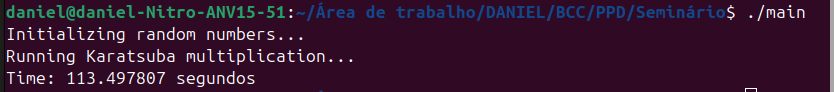

**CUDA (v1.0)**

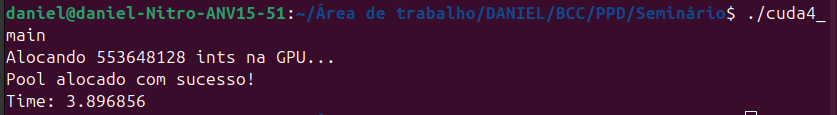

<br>

### **Speedup CUDA (v1.0)**
Considerando o resultado local, obtemos um speedup de **10.20**

### **Speedup CUDA (v2.0)**
Considerando o resultado local, obtemos um speedup de **29.12**

---

<br>

# **4. Tentando outras alternativas com CUDA**



### **4.1 Algoritmo com CUDA (v2.0)**

Nesta etapa, exploramos a ideia de realizar a multiplicação de números muito grandes utilizando apenas o gradeSchool(), ou seja, a multiplicação padrão que conhecemos. Vamos verificar seu desempenho executando como kernel na GPU e comparar com implementações que utilizam a função karatsuba.

In [ ]:
%%writefile cudav2.cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <time.h>

// nvcc -arch=sm_86 -O3 -o gradeSchoolDan gradeSchoolDan.cu

#define MAX_DIGITS 2097152 // 2MB de dígitos
#define TILE_SIZE 512

// Kernel otimizado que utiliza melhor a memória compartilhada e reduz chamadas de atomicAdd
__global__ void multiplyKernel_optimized(int *a, int *b, int *result, int digits) {
    __shared__ int shared_a[TILE_SIZE];
    __shared__ int shared_b[TILE_SIZE];

    int a_tile_idx = blockIdx.x;
    int a_start = a_tile_idx * TILE_SIZE;
    int tid = threadIdx.x;

    // Carrega o tile de A para o bloco
    if (a_start + tid < digits)
        shared_a[tid] = a[a_start + tid];
    else
        shared_a[tid] = 0;
    __syncthreads();

    int num_b_tiles = (digits + TILE_SIZE - 1) / TILE_SIZE;
    for (int b_tile_idx = 0; b_tile_idx < num_b_tiles; b_tile_idx++) {
        int b_start = b_tile_idx * TILE_SIZE;
        // Carrega o tile de B para o bloco
        if (b_start + tid < digits)
            shared_b[tid] = b[b_start + tid];
        else
            shared_b[tid] = 0;
        __syncthreads();

        // Cada iteração calcula um tile parcial do produto (tamanho 2*TILE_SIZE).
        // Cada thread calculará até duas posições no tile, evitando chamadas repetidas a atomicAdd.
        int sum1 = 0, sum2 = 0;

        // Primeira posição: k = tid
        int k1 = tid;
        if (k1 < 2 * TILE_SIZE) {
            int i_min = (k1 >= TILE_SIZE) ? k1 - (TILE_SIZE - 1) : 0;
            int i_max = (k1 < TILE_SIZE) ? k1 : TILE_SIZE - 1;
            for (int i = i_min; i <= i_max; i++) {
                int j = k1 - i;
                sum1 += shared_a[i] * shared_b[j];
            }
        }

        // Segunda posição: k = tid + TILE_SIZE
        int k2 = tid + TILE_SIZE;
        if (k2 < 2 * TILE_SIZE) {
            int i_min = (k2 >= TILE_SIZE) ? k2 - (TILE_SIZE - 1) : 0;
            int i_max = (k2 < TILE_SIZE) ? k2 : TILE_SIZE - 1;
            for (int i = i_min; i <= i_max; i++) {
                int j = k2 - i;
                sum2 += shared_a[i] * shared_b[j];
            }
        }
        __syncthreads();

        // Índice base global para este tile parcial
        int base_idx = a_start + b_start;
        // Cada thread atualiza até duas posições do resultado global com uma única chamada atomicAdd por posição.
        if (base_idx + tid < 2 * digits) {
            atomicAdd(&result[base_idx + tid], sum1);
        }
        if (base_idx + tid + TILE_SIZE < 2 * digits) {
            atomicAdd(&result[base_idx + tid + TILE_SIZE], sum2);
        }
        __syncthreads();
    }
}

void normalizeResult(int *r, int size) {
    int carry = 0;
    for (int i = 0; i < size; ++i) {
        r[i] += carry;
        carry = r[i] / 10;
        r[i] %= 10;
    }
}

void randomNum(int *a, int d) {
    for (int i = 0; i < d; ++i) {
        a[i] = rand() % 10;
    }
    if (d > 0 && a[d-1] == 0) {
        a[d-1] = (rand() % 9) + 1;
    }
}

int main() {
    int *a = (int*)malloc(MAX_DIGITS * sizeof(int));
    int *b = (int*)malloc(MAX_DIGITS * sizeof(int));
    int *r = (int*)calloc(2 * MAX_DIGITS, sizeof(int));

    srand(time(NULL));
    randomNum(a, MAX_DIGITS);
    randomNum(b, MAX_DIGITS);
    clock_t start = clock();

    int *d_a, *d_b, *d_r;
    cudaMalloc(&d_a, MAX_DIGITS * sizeof(int));
    cudaMalloc(&d_b, MAX_DIGITS * sizeof(int));
    cudaMalloc(&d_r, 2 * MAX_DIGITS * sizeof(int));

    cudaMemcpy(d_a, a, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, b, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemset(d_r, 0, 2 * MAX_DIGITS * sizeof(int));

    int num_blocks = (MAX_DIGITS + TILE_SIZE - 1) / TILE_SIZE;
    multiplyKernel_optimized<<<num_blocks, TILE_SIZE>>>(d_a, d_b, d_r, MAX_DIGITS);

    cudaMemcpy(r, d_r, 2 * MAX_DIGITS * sizeof(int), cudaMemcpyDeviceToHost);
    normalizeResult(r, 2 * MAX_DIGITS);

    // Trechos de verificação (descomentáveis se necessário)
    // printf("Número 1: ");
    // for (int i = MAX_DIGITS-1; i >= 0; i--) printf("%d", a[i]);
    // printf("\nNúmero 2: ");
    // for (int i = MAX_DIGITS-1; i >= 0; i--) printf("%d", b[i]);
    // printf("\nResultado: ");
    // for (int i = 2*MAX_DIGITS-1; i >= 0; i--) printf("%d", r[i]);

    printf("\n");
    printf("Time: %f\n", ((double)(clock() - start)) / CLOCKS_PER_SEC);

    free(a); free(b); free(r);
    cudaFree(d_a); cudaFree(d_b); cudaFree(d_r);
    return 0;
}


Overwriting cudav2.cu


In [ ]:
!nvcc -arch=sm_75 -o cudav2 cudav2.cu
!time ./cudav2


Time: 9.769268

real	0m9.952s
user	0m9.741s
sys	0m0.145s


<br>

### **4.2 Algoritmo com CUDA (v2.1)**


In [ ]:
%%writefile cudav21.cu
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <cuda_runtime.h>

// nvcc -arch=sm_86 -O3 -o gradeSchool gradeSchool.cu

#define MAX_DIGITS 2097152
#define BLOCK_SIZE 256   // número de threads por bloco

void randomNum(int *a, int *d);
void doCarry(int *a, int d);
void getNum(int *a, int *d_a);
void printNum(int *a, int d);

// Kernel que calcula o dígito k do resultado (antes do carry)
// Cada thread calcula: ret[k] = soma de (a[i] * b[k-i]), para i tal que 0 <= i < d e 0 <= k-i < d
__global__ void gradeSchool(const int *a, const int *b, int *ret, int d) {
    int k = blockIdx.x * blockDim.x + threadIdx.x;
    if (k < 2 * d) {
        int sum = 0;

        // O índice i varia de max(0, k-d+1) até min(k, d-1)

        // se k >= d, garantimos que j = k - 1 não ultrapasse o índice máximo d - 1
        // último espaço do vetor de resultado reservado para carry
        int start = (k >= d) ? k - d + 1 : 0;

        // Se k < d, o maior valor de i possivel é k, pois i não pode ser maior do que k para que j = k - i não seja negativo).
        // Se k >= d, o maior valor de i é limitado a d - 1 (último índice do vetor)
        int end = (k < d) ? k : d - 1;

        for (int i = start; i <= end; i++) {
            int j = k - i;
            sum += a[i] * b[j];
        }
        ret[k] = sum;
    }
}

int main() {
    int len_a; // length of a
    int len_b; // length of b
    int d;   // maximum length
    int i;   // counter

    // Variáveis para tempo
    cudaEvent_t start, stop;
    float elapsedTime;

    // Cria os eventos
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    // Aloca vetores no host
    int *h_a = (int *)malloc(MAX_DIGITS * sizeof(int));
    int *h_b = (int *)malloc(MAX_DIGITS * sizeof(int));

    // Recebe os números da multiplicação por stdin nos vetores a e b, calcula o tamanho de cada vetor e inverte eles
    // getNum(h_a, &len_a);
    // getNum(h_b, &len_b);

    // Inicializa os numeros para multiplicação de forma aleátória (para testes)
    srand(time(NULL));
    len_a = MAX_DIGITS - 1;
    len_b = MAX_DIGITS - 1;

    randomNum(h_a, &len_a);
    randomNum(h_b, &len_b);

    // Verifica se os números são válidos (não são entradas vazias)
    if (len_a < 0 || len_b < 0)
    {
        printf("0\n");
        exit(0);
        return 0;
    }

    // Inicializa todo o vetor inicial com 0, em caso de um número possuir menos dígitos que o outro
    // let d be the smallest power of 2 greater than d_a and d_b,
    // and zero out the rest of a and b.
    i = (len_a > len_b) ? len_a : len_b;

    for (d = 1; d < i; d *= 2);

    for (i = len_a; i < d; i++){
        h_a[i] = 0;
    };

    for (i = len_b; i < d; i++){
        h_b[i] = 0;
    };

    // Aloca vetor de resultado no host
    int *h_r = (int *)malloc(2 * d * sizeof(int));

    // Aloca vetores no device
    int *d_a, *d_b, *d_r;
    cudaMalloc((void**)&d_a, MAX_DIGITS * sizeof(int));
    cudaMalloc((void**)&d_b, MAX_DIGITS * sizeof(int));
    cudaMalloc((void**)&d_r, 2 * d * sizeof(int));

    // Copia os números para o device
    cudaMemcpy(d_a, h_a, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, h_b, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemset(d_r, 0, 2 * d * sizeof(int));

    // Configuração do grid e dos blocos:
    // Temos 2*d posições a calcular (cada thread processa um dígito do resultado)
    int totalThreads = 2 * d;
    int numBlocks = (totalThreads + BLOCK_SIZE - 1) / BLOCK_SIZE;

    // Registra o evento de início
    cudaEventRecord(start, 0);

    // Lança o kernel
    gradeSchool<<<numBlocks, BLOCK_SIZE>>>(d_a, d_b, d_r, d);
    cudaDeviceSynchronize();

    // Copia o resultado de volta para o host
    cudaMemcpy(h_r, d_r, 2 * d * sizeof(int), cudaMemcpyDeviceToHost);

    doCarry(h_r, 2 * d);
    // printNum(h_r, 2 * d);

    // Registra o evento de término
    cudaEventRecord(stop, 0);
    cudaEventSynchronize(stop);

    // Calcula o tempo decorrido em milissegundos
    cudaEventElapsedTime(&elapsedTime, start, stop);
    printf("Tempo de execução do kernel: %f ms\n", elapsedTime);

    // Destroi os eventos
    cudaEventDestroy(start);
    cudaEventDestroy(stop);

    // Liberação de memória
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_r);
    free(h_a);
    free(h_b);
    free(h_r);

    return 0;
}

// Inicializa os dois números da multiplicação aleatoriamente
void randomNum(int *a, int *d)
{
    for (int i = 0; i < *d; i++)
    {
        a[i] = rand() % 10;
    }

    if (*d > 0 && a[*d - 1] == 0)
    {
        a[*d - 1] = (rand() % 9) + 1;
    }
}

// Função para realizar o carry (mantida sequencialmente para simplicidade)
void doCarry(int *a, int len) {
    int c = 0;
    for (int i = 0; i < len; i++) {
        a[i] += c;
        c = a[i] / 10;
        a[i] %= 10;
    }
    if (c != 0)
        fprintf(stderr, "Overflow %d\n", c);
}

// Função para ler os números da multiplicação com stdin
void getNum(int *a, int *d_a)
{
    int c;
    int i;

    *d_a = 0;
    while (1)
    {
        c = getchar();
        if (c == '\n' || c == EOF)
            break;
        if (*d_a >= MAX_DIGITS)
        {
            fprintf(stderr, "using only first %d digits\n", MAX_DIGITS);
            while (c != '\n' && c != EOF)
                c = getchar();
        }
        a[*d_a] = c - '0';
        ++(*d_a);
    }
    // reverse the number so that the 1's digit is first
    for (i = 0; i * 2 < *d_a - 1; i++)
    {
        c = a[i], a[i] = a[*d_a - i - 1], a[*d_a - i - 1] = c;
    }
}

// Função para imprimir o resultado
void printNum(int *a, int d)
{
    int i;
    for (i = d - 1; i > 0; i--)
        if (a[i] != 0)
            break;
    for (; i >= 0; i--)
        printf("%d", a[i]);
    printf("\n");
}

Writing cudav21.cu


In [ ]:
!nvcc -arch=sm_75 -o cudav21 cudav21.cu
!time ./cudav21

Tempo de execução do kernel: 12110.203125 ms

real	0m12.360s
user	0m12.179s
sys	0m0.139s


<br>

### **4.3 Desempenho**

**Algoritmo com CUDA (v2.0)**

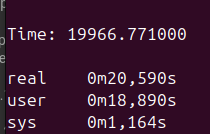

**Algoritmo com CUDA (v2.1)**

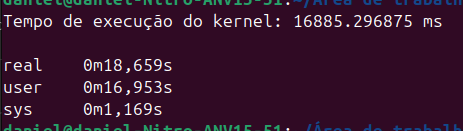

<br>

### **Speedup CUDA (v2.0)**
Considerando o resultado local, obtemos um speedup de **5,69**

### **Speedup CUDA (v2.1)**
Considerando o resultado local, obtemos um speedup de **6,63**

<br>

# **5. Tentando outras alternativas com CUDA** (etapa 2)

Aqui, a ideia é continuar os experimentos, mas agora utilizando karatsuba unicamente na CPU e gradeSchool calculada na GPU.  

### **5.1 Algoritmo com CUDA (v3.0)**

In [ ]:
%%writefile cudav3.cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <time.h>

#define MAX_DIGITS 2097152   // 2 MB de dígitos
#define TILE_SIZE 512
#define KARAT_CUTOFF 8192      // Limite para usar a multiplicação via GPU

void randomNum(int *a, int *d);
void doCarry(int *a, int d);
void getNum(int *a, int *d_a);
void printNum(int *a, int d);

__global__ void multiplyKernel_optimized(int *a, int *b, int *result, int digits) {
    __shared__ int shared_a[TILE_SIZE];
    __shared__ int shared_b[TILE_SIZE];

    int a_tile_idx = blockIdx.x;
    int a_start = a_tile_idx * TILE_SIZE;
    int tid = threadIdx.x;

    // Carrega o tile de A na memória compartilhada
    if (a_start + tid < digits)
        shared_a[tid] = a[a_start + tid];
    else
        shared_a[tid] = 0;
    __syncthreads();

    int num_b_tiles = (digits + TILE_SIZE - 1) / TILE_SIZE;
    for (int b_tile_idx = 0; b_tile_idx < num_b_tiles; b_tile_idx++) {
        int b_start = b_tile_idx * TILE_SIZE;
        // Carrega o tile de B na memória compartilhada
        if (b_start + tid < digits)
            shared_b[tid] = b[b_start + tid];
        else
            shared_b[tid] = 0;
        __syncthreads();

        // Cada iteração computa um tile parcial do produto (tamanho 2*TILE_SIZE)
        int sum1 = 0, sum2 = 0;

        // Primeira posição: k = tid
        int k1 = tid;
        if (k1 < 2 * TILE_SIZE) {
            int i_min = (k1 >= TILE_SIZE) ? k1 - (TILE_SIZE - 1) : 0;
            int i_max = (k1 < TILE_SIZE) ? k1 : TILE_SIZE - 1;
            for (int i = i_min; i <= i_max; i++) {
                int j = k1 - i;
                sum1 += shared_a[i] * shared_b[j];
            }
        }

        // Segunda posição: k = tid + TILE_SIZE
        int k2 = tid + TILE_SIZE;
        if (k2 < 2 * TILE_SIZE) {
            int i_min = (k2 >= TILE_SIZE) ? k2 - (TILE_SIZE - 1) : 0;
            int i_max = (k2 < TILE_SIZE) ? k2 : TILE_SIZE - 1;
            for (int i = i_min; i <= i_max; i++) {
                int j = k2 - i;
                sum2 += shared_a[i] * shared_b[j];
            }
        }
        __syncthreads();

        // Atualiza o resultado global (produto bruto, sem carry)
        int base_idx = a_start + b_start;
        if (base_idx + tid < 2 * digits) {
            atomicAdd(&result[base_idx + tid], sum1);
        }
        if (base_idx + tid + TILE_SIZE < 2 * digits) {
            atomicAdd(&result[base_idx + tid + TILE_SIZE], sum2);
        }
        __syncthreads();
    }
}

void karatsuba(int *a, int *b, int *ret, int d) {
    int i;
    if (d <= KARAT_CUTOFF) {
        // Caso base: realiza a multiplicação utilizando a GPU diretamente
        int size_a = d * sizeof(int);
        int size_ret = (2 * d) * sizeof(int);
        int *d_a, *d_b, *d_ret;

        cudaMalloc((void**)&d_a, size_a);
        cudaMalloc((void**)&d_b, size_a);
        cudaMalloc((void**)&d_ret, size_ret);

        cudaMemcpy(d_a, a, size_a, cudaMemcpyHostToDevice);
        cudaMemcpy(d_b, b, size_a, cudaMemcpyHostToDevice);
        cudaMemset(d_ret, 0, size_ret);

        int num_blocks = (d + TILE_SIZE - 1) / TILE_SIZE;
        multiplyKernel_optimized<<<num_blocks, TILE_SIZE>>>(d_a, d_b, d_ret, d);
        cudaDeviceSynchronize();

        cudaMemcpy(ret, d_ret, size_ret, cudaMemcpyDeviceToHost);

        cudaFree(d_a);
        cudaFree(d_b);
        cudaFree(d_ret);
        return;
    }

    // Divide os números em metades:
    // a = [ar (parte baixa) | al (parte alta)]
    // b = [br (parte baixa) | bl (parte alta)]
    int *ar = a;           // parte baixa de a
    int *al = a + d/2;     // parte alta de a
    int *br = b;           // parte baixa de b
    int *bl = b + d/2;     // parte alta de b

    // Espaço para os três produtos parciais:
    // x1 = ar * br (local: ret[0 .. d-1])
    // x2 = al * bl (local: ret[d .. 2*d-1])
    // x3 = (ar+al) * (br+bl) (local: ret[2*d .. 3*d-1])
    // Além disso, usamos espaço extra para as somas (asum e bsum) em ret[5*d ... 6*d-1]
    int *x1   = ret;           // tamanho d
    int *x2   = ret + d;       // tamanho d
    int *x3   = ret + 2*d;     // tamanho d
    int *asum = ret + 5*d;      // tamanho d/2
    int *bsum = ret + 5*d + d/2; // tamanho d/2

    // Recursão para os produtos das metades
    karatsuba(ar, br, x1, d/2);
    karatsuba(al, bl, x2, d/2);

    // Calcula as somas: asum = ar + al e bsum = br + bl
    for (i = 0; i < d/2; i++) {
        asum[i] = ar[i] + al[i];
        bsum[i] = br[i] + bl[i];
    }
    // Multiplica (ar+al)*(br+bl)
    karatsuba(asum, bsum, x3, d/2);

    // Combina os resultados:
    // x3 = x3 - x1 - x2
    for (i = 0; i < d; i++) {
        x3[i] = x3[i] - x1[i] - x2[i];
    }
    // Adiciona x3 deslocado (equivalente a multiplicar por 10^(d/2))
    for (i = 0; i < d; i++) {
        ret[i + d/2] += x3[i];
    }
}

// Função principal
int main() {
    int d_a, d_b, d, i;
    int *a = (int*)malloc(MAX_DIGITS * sizeof(int));
    int *b = (int*)malloc(MAX_DIGITS * sizeof(int));

    // Recebe os números da multiplicação por stdin nos vetores a e b, calcula o tamanho de cada vetor e inverte eles
    // getNum(a, &d_a);
    // getNum(b, &d_b);

    // É necessário que o número de dígitos seja potência de 2 para o algoritmo de Karatsuba.
    srand(time(NULL));
    d_a = MAX_DIGITS - 1;
    d_b = MAX_DIGITS - 1;

    randomNum(a, &d_a);
    randomNum(b, &d_b);

    // Determina d como a menor potência de 2 maior ou igual a max(d_a, d_b)
    int max_d = (d_a > d_b) ? d_a : d_b;
    for (d = 1; d < max_d; d *= 2)
        ;
    // Preenche com zeros as posições extras
    for (i = d_a; i < d; i++)
        a[i] = 0;
    for (i = d_b; i < d; i++)
        b[i] = 0;

    // Aloca o vetor de resultado com espaço suficiente (6*d inteiros)
    int *r = (int*)calloc(6 * d, sizeof(int));

    clock_t start = clock();
    karatsuba(a, b, r, d);
    doCarry(r, 2 * d);
    clock_t end = clock();

    printf("Tempo: %f segundos\n", ((double)(end - start)) / CLOCKS_PER_SEC);
    // Para depuração, pode-se imprimir o resultado:
    // printNum(r, 2 * d);

    free(a);
    free(b);
    free(r);

    return 0;
}

// Realiza o carry do resultado final
void doCarry(int *a, int d) {
    int carry = 0;
    for (int i = 0; i < d; i++) {
        a[i] += carry;
        carry = a[i] / 10;
        a[i] %= 10;
    }
    if (carry != 0)
        fprintf(stderr, "Overflow: %d\n", carry);
}

// Inicializa um número aleatório com dígitos
void randomNum(int *a, int *d) {
    for (int i = 0; i < *d; i++) {
        a[i] = rand() % 10;
    }
    if (*d > 0 && a[*d - 1] == 0) {
        a[*d - 1] = (rand() % 9) + 1;
    }
}

// Função para ler os números (mantida conforme original)
void getNum(int *a, int *d_a) {
    int c, i;
    *d_a = 0;
    while(1) {
        c = getchar();
        if(c == '\n' || c == EOF) break;
        if(*d_a >= MAX_DIGITS) {
            fprintf(stderr, "using only first %d digits\n", MAX_DIGITS);
            while(c != '\n' && c != EOF) c = getchar();
        }
        a[*d_a] = c - '0';
        ++(*d_a);
    }
    for(i = 0; i * 2 < *d_a - 1; i++) {
        c = a[i], a[i] = a[*d_a - i - 1], a[*d_a - i - 1] = c;
    }
}

// Imprime o número
void printNum(int *a, int d) {
    int i;
    for (i = d - 1; i > 0; i--) {
        if (a[i] != 0)
            break;
    }
    for (; i >= 0; i--) {
        printf("%d", a[i]);
    }
    printf("\n");
}

Writing cudav3.cu


In [ ]:
!nvcc -arch=sm_75 -o cudav3 cudav3.cu
!time ./cudav3

Tempo: 5.083925 segundos

real	0m5.204s
user	0m4.186s
sys	0m1.009s


<br>

### **5.2 Algoritmo com CUDA (v3.1)**

In [ ]:
%%writefile cudav31.cu
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <cuda_runtime.h>

// nvcc -arch=sm_86 -O3 -o karatsuba_gradeSchool karatsuba_gradeSchool.cu

#define MAX_DIGITS 2097152
#define KARAT_CUTOFF 8192
#define BLOCK_SIZE 256   // número de threads por bloco para o kernel CUDA

void randomNum(int *a, int *d);
void doCarry(int *a, int d);
void getNum(int *a, int *d_a);
void printNum(int *a, int d);

// Kernel CUDA – Multiplicação gradeSchool (GPU)
__global__ void gradeSchool(const int *a, const int *b, int *ret, int d) {
    int k = blockIdx.x * blockDim.x + threadIdx.x;

    if (k < 2 * d) {
        int sum = 0;
        int start = (k >= d) ? k - d + 1 : 0;
        int end   = (k < d) ? k : d - 1;

        for (int i = start; i <= end; i++) {
            int j = k - i;
            sum += a[i] * b[j];
        }
        ret[k] = sum;
    }
}

void karatsuba(int *a, int *b, int *ret, int d) {

    // Caso base: se d é pequeno, realiza a multiplicação gradeSchool na GPU
    if (d <= KARAT_CUTOFF) {
        int *d_a, *d_b, *d_r;
        size_t size_a = d * sizeof(int);
        size_t size_r = 2 * d * sizeof(int);

        cudaMalloc((void**)&d_a, size_a);
        cudaMalloc((void**)&d_b, size_a);
        cudaMalloc((void**)&d_r, size_r);

        cudaMemcpy(d_a, a, size_a, cudaMemcpyHostToDevice);
        cudaMemcpy(d_b, b, size_a, cudaMemcpyHostToDevice);
        cudaMemset(d_r, 0, size_r);

        int totalThreads = 2 * d;
        int numBlocks = (totalThreads + BLOCK_SIZE - 1) / BLOCK_SIZE;

        gradeSchool<<<numBlocks, BLOCK_SIZE>>>(d_a, d_b, d_r, d);
        cudaDeviceSynchronize();

        cudaMemcpy(ret, d_r, size_r, cudaMemcpyDeviceToHost);

        cudaFree(d_a);
        cudaFree(d_b);
        cudaFree(d_r);
        return;
    }

    int i;
    int *ar = &a[0];       // parte baixa de a
    int *al = &a[d/2];     // parte alta de a
    int *br = &b[0];       // parte baixa de b
    int *bl = &b[d/2];     // parte alta de b
    int *asum = &ret[d * 5];       // al + ar
    int *bsum = &ret[d * 5 + d/2];   // bl + br
    int *x1 = &ret[d * 0];         // ar * br
    int *x2 = &ret[d * 1];         // al * bl
    int *x3 = &ret[d * 2];         // (al+ar) * (bl+br)

    // Calcula as somas dos pedaços
    for (i = 0; i < d/2; i++) {
        asum[i] = al[i] + ar[i];
        bsum[i] = bl[i] + br[i];
    }

    // Chamada recursiva
    karatsuba(ar, br, x1, d/2);
    karatsuba(al, bl, x2, d/2);
    karatsuba(asum, bsum, x3, d/2);

    // Combina os resultados: x3 = (al+ar)*(bl+br) - (ar*br) - (al*bl)
    for (i = 0; i < d; i++) {
        x3[i] = x3[i] - x1[i] - x2[i];
    }

    // Soma x3 com deslocamento na posição correta
    for (i = 0; i < d; i++) {
        ret[i + d/2] += x3[i];
    }
}

int main() {
    int d_a, d_b, d, i;
    int *a = (int *)malloc(MAX_DIGITS * sizeof(int));
    int *b = (int *)malloc(MAX_DIGITS * sizeof(int));
    int *r = (int *)malloc(6 * MAX_DIGITS * sizeof(int));

    // Recebe os números da multiplicação por stdin nos vetores a e b, calcula o tamanho de cada vetor e inverte eles
    // getNum(a, &d_a);
    // getNum(b, &d_b);

    // printf("Initializing random numbers...\n");
    srand(time(NULL));
    d_a = MAX_DIGITS - 1;
    d_b = MAX_DIGITS - 1;

    randomNum(a, &d_a);
    randomNum(b, &d_b);

    if(d_a < 0 || d_b < 0) {
        printf("0\n");
        exit(0);
    }

    // Define d como a menor potência de 2 maior ou igual a d_a e d_b
    i = (d_a > d_b) ? d_a : d_b;
    for(d = 1; d < i; d *= 2);
    for(i = d_a; i < d; i++){
        a[i] = 0;
    }
    for(i = d_b; i < d; i++){
        b[i] = 0;
    }

    // Medição do tempo com CUDA events
    cudaEvent_t start, stop;
    float elapsedTime;

    cudaEventCreate(&start);
    cudaEventCreate(&stop);
    cudaEventRecord(start, 0);

    karatsuba(a, b, r, d);
    doCarry(r, 2 * d);

    cudaEventRecord(stop, 0);
    cudaEventSynchronize(stop);
    cudaEventElapsedTime(&elapsedTime, start, stop);
    printf("Tempo de execução: %f ms\n", elapsedTime);

    // printNum(r, 2 * d);

    cudaEventDestroy(start);
    cudaEventDestroy(stop);

    free(a);
    free(b);
    free(r);
    return 0;
}

// Função para realizar o carry (ajuste dos dígitos)
void doCarry(int *a, int d) {
    int c = 0, i;
    for (i = 0; i < d; i++) {
        a[i] += c;
        if(a[i] < 0) {
            c = -(-(a[i] + 1) / 10 + 1);
        } else {
            c = a[i] / 10;
        }
        a[i] -= c * 10;
    }
    if(c != 0) fprintf(stderr, "Overflow %d\n", c);
}

// Função para inicializar os números aleatoriamente
void randomNum(int *a, int *d) {
    for (int i = 0; i < *d; i++){
        a[i] = rand() % 10;
    }
    if(*d > 0 && a[*d-1] == 0){
        a[*d-1] = (rand() % 9) + 1;
    }
}

// Função para ler os números (mantida conforme original)
void getNum(int *a, int *d_a) {
    int c, i;
    *d_a = 0;
    while(1) {
        c = getchar();
        if(c == '\n' || c == EOF) break;
        if(*d_a >= MAX_DIGITS) {
            fprintf(stderr, "using only first %d digits\n", MAX_DIGITS);
            while(c != '\n' && c != EOF) c = getchar();
        }
        a[*d_a] = c - '0';
        ++(*d_a);
    }
    for(i = 0; i * 2 < *d_a - 1; i++) {
        c = a[i], a[i] = a[*d_a - i - 1], a[*d_a - i - 1] = c;
    }
}

// Função para imprimir o resultado (mantida conforme original)
void printNum(int *a, int d) {
    int i;
    for(i = d - 1; i > 0; i--) {
        if(a[i] != 0) break;
    }
    for(; i >= 0; i--) {
        printf("%d", a[i]);
    }
    printf("\n");
}

Overwriting cudav31.cu


In [ ]:
!nvcc -arch=sm_75 -o cudav31 cudav31.cu
!time ./cudav31

Tempo de execução: 3681.445312 ms

real	0m4.017s
user	0m2.932s
sys	0m1.075s


<br>

### **5.3 Desempenho**

**Algoritmo com CUDA (v3.0)**

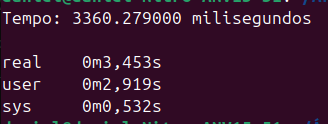

**Algoritmo com CUDA (v3.1)**

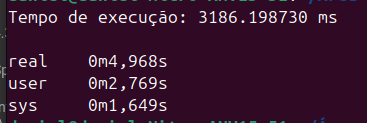

<br>

### **Speedup CUDA (v3.0)**
Considerando o resultado local, obtemos um speedup de **33,77**

### **Speedup CUDA (v3.1)**
Considerando o resultado local, obtemos um speedup de **35,62**

<br>

# **6. Tentando outras alternativas com CUDA** (etapa 3)

Nesta última etapa, os experimentos foram realizados com tanto a função karatsuba como a gradeSchool como kernels.

In [ ]:
%%writefile cudav5.cu

#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <time.h>

#define MAX_DIGITS 2097152 // 2MB of digits
#define TILE_SIZE 512
#define CUTOFF 512 // Cutoff for switching to grade school multiplication

// Kernel for grade school multiplication
__global__ void multiplyKernel_optimized(int *a, int *b, int *result, int digits) {
    __shared__ int shared_a[TILE_SIZE];
    __shared__ int shared_b[TILE_SIZE];

    int a_tile_idx = blockIdx.x;
    int a_start = a_tile_idx * TILE_SIZE;
    int tid = threadIdx.x;

    if (a_start + tid < digits)
        shared_a[tid] = a[a_start + tid];
    else
        shared_a[tid] = 0;
    __syncthreads();

    int num_b_tiles = (digits + TILE_SIZE - 1) / TILE_SIZE;
    for (int b_tile_idx = 0; b_tile_idx < num_b_tiles; b_tile_idx++) {
        int b_start = b_tile_idx * TILE_SIZE;
        if (b_start + tid < digits)
            shared_b[tid] = b[b_start + tid];
        else
            shared_b[tid] = 0;
        __syncthreads();

        int sum1 = 0, sum2 = 0;
        int k1 = tid;
        if (k1 < 2 * TILE_SIZE) {
            int i_min = (k1 >= TILE_SIZE) ? k1 - (TILE_SIZE - 1) : 0;
            int i_max = (k1 < TILE_SIZE) ? k1 : TILE_SIZE - 1;
            for (int i = i_min; i <= i_max; i++) {
                int j = k1 - i;
                sum1 += shared_a[i] * shared_b[j];
            }
        }

        int k2 = tid + TILE_SIZE;
        if (k2 < 2 * TILE_SIZE) {
            int i_min = (k2 >= TILE_SIZE) ? k2 - (TILE_SIZE - 1) : 0;
            int i_max = (k2 < TILE_SIZE) ? k2 : TILE_SIZE - 1;
            for (int i = i_min; i <= i_max; i++) {
                int j = k2 - i;
                sum2 += shared_a[i] * shared_b[j];
            }
        }
        __syncthreads();

        int base_idx = a_start + b_start;
        if (base_idx + tid < 2 * digits) {
            atomicAdd(&result[base_idx + tid], sum1);
        }
        if (base_idx + tid + TILE_SIZE < 2 * digits) {
            atomicAdd(&result[base_idx + tid + TILE_SIZE], sum2);
        }
        __syncthreads();
    }
}

// Kernel for Karatsuba multiplication with recursive calls
__global__ void karatsubaKernel(int *a, int *b, int *result, int digits, int cutoff) {
    if (threadIdx.x == 0 && blockIdx.x == 0) { // Ensure only one thread executes
        if (digits <= cutoff) {
            // Base case: use grade school multiplication
            int num_blocks = (digits + TILE_SIZE - 1) / TILE_SIZE;
            multiplyKernel_optimized<<<num_blocks, TILE_SIZE>>>(a, b, result, digits);
            cudaDeviceSynchronize(); // Wait for grade school kernel to finish
        } else {
            int half = digits / 2;

            // Pointers for high and low parts
            int *a_low = a;
            int *a_high = a + half;
            int *b_low = b;
            int *b_high = b + half;

            // Allocate memory for intermediate results
            int *z0, *z1, *z2, *a_sum, *b_sum;
            cudaMalloc(&z0, 2 * half * sizeof(int));
            cudaMalloc(&z1, 2 * half * sizeof(int));
            cudaMalloc(&z2, 2 * (digits - half) * sizeof(int));
            cudaMalloc(&a_sum, half * sizeof(int));
            cudaMalloc(&b_sum, half * sizeof(int));

            // Initialize memory
            cudaMemset(z0, 0, 2 * half * sizeof(int));
            cudaMemset(z1, 0, 2 * half * sizeof(int));
            cudaMemset(z2, 0, 2 * (digits - half) * sizeof(int));

            // Compute a_sum and b_sum
            for (int i = 0; i < half; i++) {
                a_sum[i] = a_high[i] + a_low[i];
                b_sum[i] = b_high[i] + b_low[i];
            }

            // Launch child Karatsuba kernels for subproblems
            karatsubaKernel<<<1, 1>>>(a_low, b_low, z0, half, cutoff);
            karatsubaKernel<<<1, 1>>>(a_high, b_high, z2, digits - half, cutoff);
            karatsubaKernel<<<1, 1>>>(a_sum, b_sum, z1, half, cutoff);
            cudaDeviceSynchronize(); // Wait for child kernels to finish

            // Combine results
            for (int i = 0; i < 2 * half; i++) {
                result[i] = z0[i];
            }
            for (int i = 0; i < 2 * (digits - half); i++) {
                result[i + 2 * half] = z2[i];
            }
            for (int i = 0; i < 2 * half; i++) {
                result[i + half] += z1[i] - z0[i] - (i < 2 * (digits - half) ? z2[i] : 0);
            }

            // Free allocated memory
            cudaFree(z0);
            cudaFree(z1);
            cudaFree(z2);
            cudaFree(a_sum);
            cudaFree(b_sum);
        }
    }
}

// Function to normalize the result (carry propagation)
void normalizeResult(int *r, int size) {
    int carry = 0;
    for (int i = 0; i < size; ++i) {
        r[i] += carry;
        carry = r[i] / 10;
        r[i] %= 10;
    }
}

// Function to generate random numbers
void randomNum(int *a, int d) {
    for (int i = 0; i < d; ++i) {
        a[i] = rand() % 10;
    }
    if (d > 0 && a[d-1] == 0) {
        a[d-1] = (rand() % 9) + 1;
    }
}

void printNum(int *a, int d)
{
    int i;
    for (i = d - 1; i > 0; i--)
        if (a[i] != 0)
            break;
    for (; i >= 0; i--)
        printf("%d", a[i]);
    printf("\n");
}

int escrever(const char *nomeArquivo, const int *vetor, int tamanho) {
    FILE *arquivo = fopen(nomeArquivo, "w");
    if (arquivo == NULL) {
        perror("Erro ao abrir o arquivo");
        return 1;
    }
    int i;
    for (i = tamanho - 1; i > tamanho / 10; i--) if (vetor[i] != 0) break;
    for (; i >= 0; i--) fprintf(arquivo, "%d", vetor[i]);
    fprintf(arquivo, "\n");
    fclose(arquivo);
    return 0;
}

int main() {
    int *a = (int*)malloc(MAX_DIGITS * sizeof(int));
    int *b = (int*)malloc(MAX_DIGITS * sizeof(int));
    int *r = (int*)calloc(2 * MAX_DIGITS, sizeof(int));

    srand(time(NULL));
    randomNum(a, MAX_DIGITS);
    randomNum(b, MAX_DIGITS);

    printNum(a, MAX_DIGITS);
    printNum(b, MAX_DIGITS);
    clock_t start = clock();

    int *d_a, *d_b, *d_r;
    cudaMalloc(&d_a, MAX_DIGITS * sizeof(int));
    cudaMalloc(&d_b, MAX_DIGITS * sizeof(int));
    cudaMalloc(&d_r, 2 * MAX_DIGITS * sizeof(int));

    cudaMemset(d_r, 0, 2 * MAX_DIGITS * sizeof(int));
    cudaMemset(d_a, 0, MAX_DIGITS * sizeof(int));
    cudaMemset(d_b, 0, MAX_DIGITS * sizeof(int));

    cudaMemcpy(d_a, a, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, b, MAX_DIGITS * sizeof(int), cudaMemcpyHostToDevice);

    // Launch the Karatsuba kernel with 1 block and 1 thread
    karatsubaKernel<<<1, 1>>>(d_a, d_b, d_r, MAX_DIGITS, CUTOFF);
    cudaDeviceSynchronize(); // Ensure all recursive calls and children finish

    cudaMemcpy(r, d_r, 2 * MAX_DIGITS * sizeof(int), cudaMemcpyDeviceToHost);
    normalizeResult(r, 2 * MAX_DIGITS);
    escrever("cuda.txt", r, 2*MAX_DIGITS);

    printf("Time: %f seconds\n", ((double)(clock() - start)) / CLOCKS_PER_SEC);

    free(a);
    free(b);
    free(r);
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_r);

    return 0;
}

<br>

# **🗃️ Fontes**

-  https://thegrenze.com/pages/servej.php?association=GRENZE&fn=735.pdf&id=3467&issue=2&journal=GIJET&name=Karatsuba+Algorithm%3A+Parallelization+using+CUDA&volume=10&year=2024 – O artigo “Karatsuba Algorithm: Parallelization using CUDA” discute os desafios de paralelizar a recursão do Karatsuba na GPU.

-  https://worldcomp-proceedings.com/proc/p2014/PDP4208.pdf – O estudo “Multiple Precision Integer Multiplication on GPUs”

- https://www.researchgate.net/publication/268209735_Performance_Evaluation_of_Long_Integer_Multiplication_Using_OpenMP_and_MPI_on_Shared_Memory_Architecture - O artigo "Performance Evaluation of Long Integer Multiplication Using OpenMP and MPI on Shared Memory Architecture" descreve os passos principais de uma estratégia de paralelização do algoritmo de Karatsuba com base em processamento paralelo com threads em um processador.

- https://www.researchgate.net/publication/340689422_Some_Improvements_of_the_Parallel_Karatsuba_Algorithm_Student_paper - O artigo "Some Improvements of the Parallel Karatsuba Algorithm Studend Paper" descreve uma estratégia de paralelização do algoritmo de Karatsuba com OpenMP e apresenta, brevemente, alguns resultados obtidos pelos pesquisadores, com comparações em relação à versão sequencial do código.

